Se importan las librerias necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import TomekLinks
from matplotlib import pyplot
from numpy import where

Lectura de todos los datasets de entrada

In [2]:
df_2017 = pd.read_excel(r'C:\Users\gabol\Downloads\Compressed\Datasets TFM-20211110T015007Z-001\Datasets TFM\Bal2017.xlsx')
df_2018 = pd.read_excel(r'C:\Users\gabol\Downloads\Compressed\Datasets TFM-20211110T015007Z-001\Datasets TFM\Bal2018.xlsx')
df_2019 = pd.read_excel(r'C:\Users\gabol\Downloads\Compressed\Datasets TFM-20211110T015007Z-001\Datasets TFM\Bal2019.xlsx')
df_2020 = pd.read_excel(r'C:\Users\gabol\Downloads\Compressed\Datasets TFM-20211110T015007Z-001\Datasets TFM\Bal2020.xlsx')
df_contratos = pd.read_excel(r'C:\Users\gabol\Downloads\Compressed\Datasets TFM-20211110T015007Z-001\Datasets TFM\ContratosEstado.xlsx')
df_datos_empresa=pd.read_excel(r'C:\Users\gabol\Downloads\Compressed\Datasets TFM-20211110T015007Z-001\Datasets TFM\Datos-Empresa.xlsx')
df_rama_judicial= pd.read_excel(r'C:\Users\gabol\Downloads\Compressed\Datasets TFM-20211110T015007Z-001\Datasets TFM\RamaJudicial.xlsx')
df_modificacion_statutos=pd.read_excel(r'C:\Users\gabol\Downloads\Compressed\Datasets TFM-20211110T015007Z-001\Datasets TFM\ModificacionEstatutos.xlsx')
df_partidas = pd.read_excel(r'C:\Users\gabol\Downloads\Compressed\Datasets TFM-20211110T015007Z-001\Datasets TFM\Partidas.xlsx')

Nombres de campos para dataset con informacion financiera anual

In [3]:
df_2017_names = df_2017.rename(columns=dict(df_partidas.values))
df_partidas

,PARTIDA,DESCRIPCION
0,AC,ACTIVO
1,ACC,TOTAL ACTIVO CORRIENTE
2,ACC113,CUENTAS POR COBRAR - DEUDORES
3,ACC114,INVENTARIOS
4,ACC118,OTROS ACTIVOS
5,ACC11H,ACTIVOS POR IMPUESTOS CORRIENTES
6,ACC211,EFECTIVO Y EQUI.
7,ACL,ACTIVOS NO CORRIENTES
8,ACL115,PROPIEDADES PLANTA Y EQUIPO
9,ACL118,OTROS ACTIVOS


Se puede ver que todos los campos son numericos

In [4]:
percent_missing = df_2017_names.isnull().sum() * 100 / len(df_2017)
missing_value_df = pd.DataFrame({'column_name': df_2017.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df

,column_name,percent_missing
GASTOS DE VENTAS,RAGE52,98.281619
PROPIEDAD DE INVERSIÓN,ACL11M,75.136412
ACTIVOS INTANGIBLES DISTINTOS DE LA PLUS,ACL11Q,67.578793
OTROS ACTIVOS,ACL118,59.280072
SUPERAVIT DE CAPITAL,PTT132,57.105627
ACTIVOS POR IMPUESTOS DIFERIDOS,ACL11R,54.564704
PASIVO POR IMPUESTOS DIFERIDOS,PSL12J,50.761463
OTROS PASIVOS NO CORRIENTES,PSL228,48.065803
OTROS ACTIVOS,ACC118,46.762766
INGRESOS FINANCIEROS,RAIXFI,46.371854


Para los valores nulos, se eliminan todos los atributos que tengas mas de 50% de valores nulos y se rellena el resto con 0. Al ser la mayoria de campos partes de formulas se asume que los valores nulos estan incluidos en los campos agregados.

In [5]:
#eLIMINAR CAMPOS CON MAS DE 50% DE NULOS
df_2017 = df_2017.drop('RAGE52', 1)
df_2017 = df_2017.drop('ACL11M', 1)
df_2017 = df_2017.drop('ACL11Q', 1)
df_2017 = df_2017.drop('ACL118', 1)
df_2017 = df_2017.drop('PTT132', 1)
df_2017 = df_2017.drop('ACL11R', 1)
df_2017 = df_2017.drop('PSL12J', 1)
df_2017=df_2017.fillna(0)

df_2018 = df_2018.drop('RAGE52', 1)
df_2018 = df_2018.drop('ACL11M', 1)
df_2018 = df_2018.drop('ACL11Q', 1)
df_2018 = df_2018.drop('ACL118', 1)
df_2018 = df_2018.drop('PTT132', 1)
df_2018 = df_2018.drop('ACL11R', 1)
df_2018 = df_2018.drop('PSL12J', 1)
df_2018=df_2018.fillna(0)

df_2019 = df_2019.drop('RAGE52', 1)
df_2019 = df_2019.drop('ACL11M', 1)
df_2019 = df_2019.drop('ACL11Q', 1)
df_2019 = df_2019.drop('ACL118', 1)
df_2019 = df_2019.drop('PTT132', 1)
df_2019 = df_2019.drop('ACL11R', 1)
df_2019 = df_2019.drop('PSL12J', 1)
df_2019=df_2019.fillna(0)

df_2020 = df_2020.drop('RAGE52', 1)
df_2020 = df_2020.drop('ACL11M', 1)
df_2020 = df_2020.drop('ACL11Q', 1)
df_2020 = df_2020.drop('ACL118', 1)
df_2020 = df_2020.drop('PTT132', 1)
df_2020 = df_2020.drop('ACL11R', 1)
df_2020 = df_2020.drop('PSL12J', 1)
df_2020=df_2020.fillna(0)

Otra consecuencia de tener varios campos calculados es la alta correlacion entre estos, se muestran los que tienen correlacion de mas del 90% y se eliminan uno de los pares, toamndo en cuenta el campo que mayor numero de nulos tenga y los que sean agregados y existan sus subcomponentes.

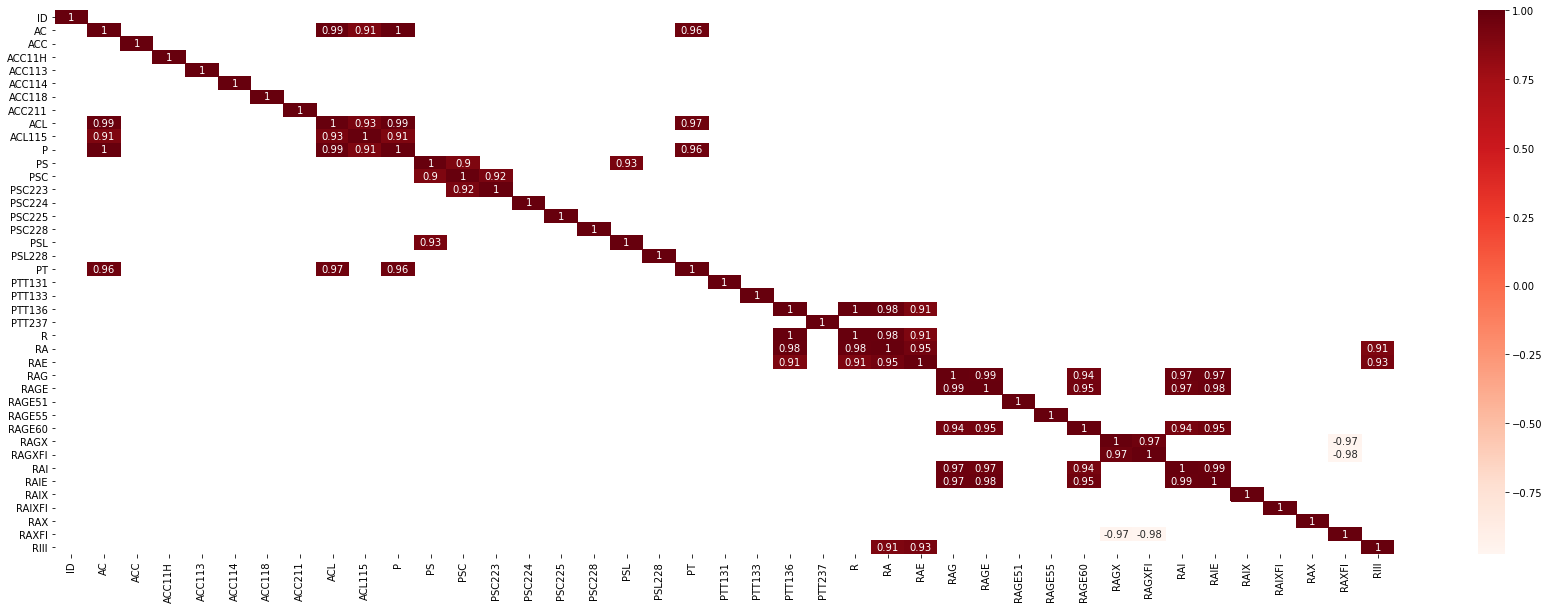

In [6]:
dfCorr = df_2017.corr()
filteredDf = dfCorr[((dfCorr >= .9) | (dfCorr <= -.9)) ]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [7]:
#eMILINAR CAMPOS CON ALTA CORRELACION ENTRE ELLOS
df_2017 = df_2017.drop('P', 1)
df_2017 = df_2017.drop('AC', 1)
df_2017 = df_2017.drop('R', 1)
df_2017 = df_2017.drop('RAG', 1)
df_2017 = df_2017.drop('RAGX', 1)
df_2017 = df_2017.drop('RAIXFI', 1)
#df_2017 = df_2017.drop('PT', 1)
df_2017 = df_2017.drop('RA', 1)
df_2017 = df_2017.drop('RAGE', 1)
df_2017 = df_2017.drop('RAGE60', 1)
df_2017 = df_2017.drop('RAXFI', 1)
df_2017 = df_2017.drop('RAI', 1)
df_2017 = df_2017.drop('PS', 1)
df_2017 = df_2017.drop('PTT136', 1)
df_2017 = df_2017.drop('ACL115', 1)
df_2017 = df_2017.drop('PSC223', 1)
df_2017 = df_2017.drop('RIII', 1)

df_2018 = df_2018.drop('P', 1)
df_2018 = df_2018.drop('AC', 1)
df_2018 = df_2018.drop('R', 1)
df_2018 = df_2018.drop('RAG', 1)
df_2018 = df_2018.drop('RAGX', 1)
df_2018 = df_2018.drop('RAIXFI', 1)
#df_2018 = df_2018.drop('PT', 1)
df_2018 = df_2018.drop('RA', 1)
df_2018 = df_2018.drop('RAGE', 1)
df_2018 = df_2018.drop('RAGE60', 1)
df_2018 = df_2018.drop('RAXFI', 1)
df_2018 = df_2018.drop('RAI', 1)
df_2018 = df_2018.drop('PS', 1)
df_2018 = df_2018.drop('PTT136', 1)
df_2018 = df_2018.drop('ACL115', 1)
df_2018 = df_2018.drop('PSC223', 1)
df_2018 = df_2018.drop('RIII', 1)

df_2019 = df_2019.drop('P', 1)
df_2019 = df_2019.drop('AC', 1)
df_2019 = df_2019.drop('R', 1)
df_2019 = df_2019.drop('RAG', 1)
df_2019 = df_2019.drop('RAGX', 1)
df_2019 = df_2019.drop('RAIXFI', 1)
#df_2019 = df_2019.drop('PT', 1)
df_2019 = df_2019.drop('RA', 1)
df_2019 = df_2019.drop('RAGE', 1)
df_2019 = df_2019.drop('RAGE60', 1)
df_2019 = df_2019.drop('RAXFI', 1)
df_2019 = df_2019.drop('RAI', 1)
df_2019 = df_2019.drop('PS', 1)
df_2019 = df_2019.drop('PTT136', 1)
df_2019 = df_2019.drop('ACL115', 1)
df_2019 = df_2019.drop('PSC223', 1)
df_2019 = df_2019.drop('RIII', 1)

df_2020 = df_2020.drop('P', 1)
df_2020 = df_2020.drop('AC', 1)
df_2020 = df_2020.drop('R', 1)
df_2020 = df_2020.drop('RAG', 1)
df_2020 = df_2020.drop('RAGX', 1)
df_2020 = df_2020.drop('RAIXFI', 1)
df_2020 = df_2020.drop('PT', 1)
df_2020 = df_2020.drop('RA', 1)
df_2020 = df_2020.drop('RAGE', 1)
df_2020 = df_2020.drop('RAGE60', 1)
df_2020 = df_2020.drop('RAXFI', 1)
df_2020 = df_2020.drop('RAI', 1)
df_2020 = df_2020.drop('PS', 1)
df_2020 = df_2020.drop('PTT136', 1)
df_2020 = df_2020.drop('ACL115', 1)
df_2020 = df_2020.drop('PSC223', 1)
df_2020 = df_2020.drop('RIII', 1)


Se eliminan tambien los datos relacionados a los ingresos puesto que esta forma parte de la variable target

In [8]:
df_2017 = df_2017.drop('RAX', 1)
df_2017 = df_2017.drop('RAIX', 1)
df_2017 = df_2017.drop('RAE', 1)

df_2018 = df_2018.drop('RAX', 1)
df_2018 = df_2018.drop('RAIX', 1)
df_2018 = df_2018.drop('RAE', 1)

df_2019 = df_2019.drop('RAX', 1)
df_2019 = df_2019.drop('RAIX', 1)
df_2019 = df_2019.drop('RAE', 1)


df_2020 = df_2020.drop('RAX', 1)
df_2020 = df_2020.drop('RAIX', 1)
df_2020 = df_2020.drop('RAE', 1)


Como resultado de este proceso se tiene un dataset mas limpio que no conteniene informacion redundante.

Text(0.5, 1.0, 'Variable Correlation')

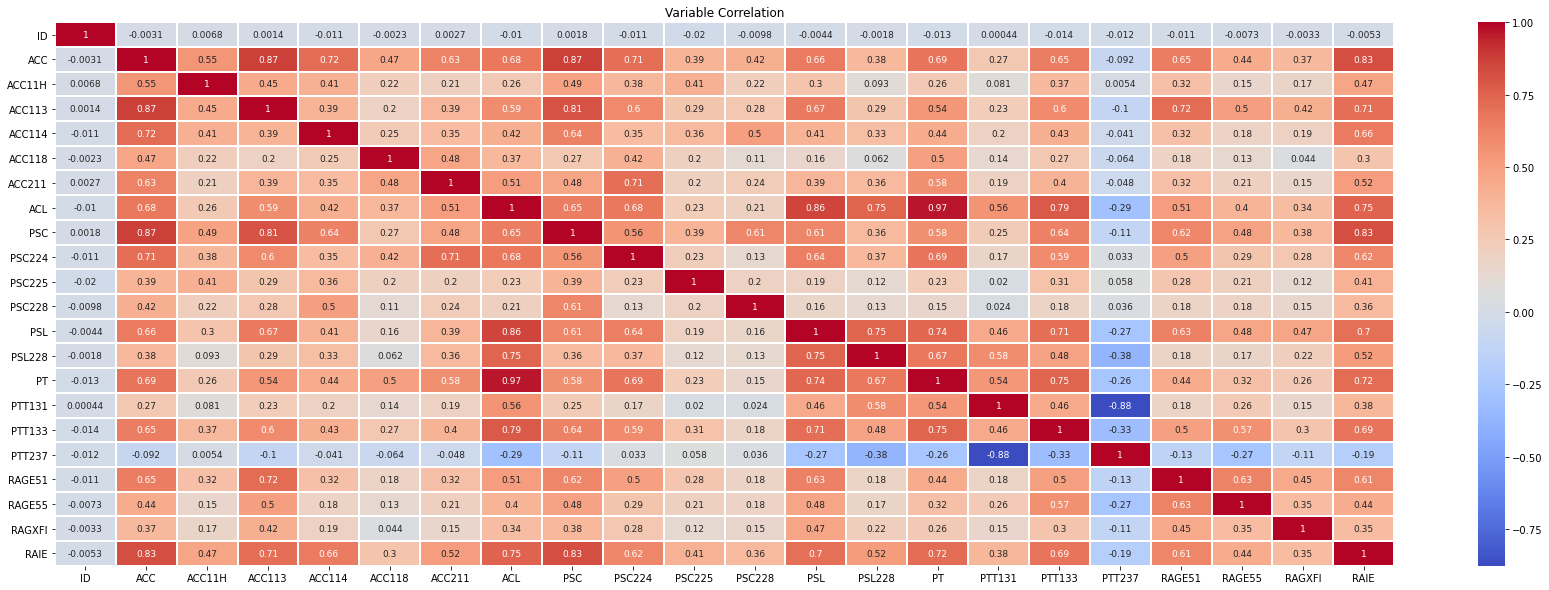

In [9]:
plt.figure(figsize=(30,10))
sns.heatmap(df_2018.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

In [10]:
#df_2017 = df_2017.rename(columns=dict(df_partidas.values))

Se agregan sufijos para identificar a los campos de cada año

In [11]:
df_2017.columns = df_2017.columns.map(lambda x: str(x) + '_2017')
df_2018.columns = df_2018.columns.map(lambda x: str(x) + '_2018')
df_2019.columns = df_2019.columns.map(lambda x: str(x) + '_2019')
df_2020.columns = df_2020.columns.map(lambda x: str(x) + '_2020')

Se eliminan registros duplicados

In [12]:
df_2017=df_2017.drop_duplicates(subset=['ID_2017'])
df_2018=df_2018.drop_duplicates(subset=['ID_2018'])
df_2019=df_2019.drop_duplicates(subset=['ID_2019'])
df_2020=df_2020.drop_duplicates(subset=['ID_2020'])

Se realiza un merge de los 4 datasets con datos financieros.

In [13]:
df_total=df_2017.merge(df_2018,left_on='ID_2017',right_on='ID_2018')
df_total=df_total.merge(df_2019,left_on='ID_2017',right_on='ID_2019')
df_total=df_total.merge(df_2020,left_on='ID_2017',right_on='ID_2020')
#.merge(df_2019,left_on='ID_2017',right_on='ID_2019').merge(df_2020,left_on='ID_2017',right_on='ID_2020')

Se extraen solo los atributos correspondientes a los ingresos totales

In [14]:
df_ingresos=df_total[['ID_2017','RAIE_2017','RAIE_2018','RAIE_2019','RAIE_2020']]

Se calcula el porcentaje de crecimiento de ingresos interanual.

In [15]:
    
df_ingresos['inter_2018'] = df_ingresos.apply(lambda row : (row['RAIE_2018']-row['RAIE_2017'])/row['RAIE_2017'], axis = 1)
df_ingresos['inter_2019'] = df_ingresos.apply(lambda row : (row['RAIE_2019']-row['RAIE_2018'])/row['RAIE_2018'], axis = 1)
df_ingresos['inter_2020'] = df_ingresos.apply(lambda row : (row['RAIE_2020']-row['RAIE_2019'])/row['RAIE_2019'], axis = 1)


<ipython-input-15-edc1dc57d1ed>:1: RuntimeWarning: invalid value encountered in double_scalars
  df_ingresos['inter_2018'] = df_ingresos.apply(lambda row : (row['RAIE_2018']-row['RAIE_2017'])/row['RAIE_2017'], axis = 1)
<ipython-input-15-edc1dc57d1ed>:1: RuntimeWarning: divide by zero encountered in double_scalars
  df_ingresos['inter_2018'] = df_ingresos.apply(lambda row : (row['RAIE_2018']-row['RAIE_2017'])/row['RAIE_2017'], axis = 1)
<ipython-input-15-edc1dc57d1ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingresos['inter_2018'] = df_ingresos.apply(lambda row : (row['RAIE_2018']-row['RAIE_2017'])/row['RAIE_2017'], axis = 1)
<ipython-input-15-edc1dc57d1ed>:2: RuntimeWarning: divide by zero encountered in double_scalars
  df_ingresos['

Se calcula las empresas de alto crecimiento, es decir, las que tienen crecimiento sostenido sobre 20%. En este caso se toma en cuenta el 2020

In [16]:
import numpy as np

df_ingresos['crecimiento']=np.where(((df_ingresos['inter_2018']>0.19)
                 & (df_ingresos['inter_2019']>0.19)
                    & (df_ingresos['inter_2020']>0.09)
                & ~(np.isinf(df_ingresos['inter_2018']))
                & ~(np.isinf(df_ingresos['inter_2019']))
                & ~(np.isinf(df_ingresos['inter_2020']))
                ) , 'crece','normal')
 


<ipython-input-16-0ab93771ae8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingresos['crecimiento']=np.where(((df_ingresos['inter_2018']>0.19)


Tambien se exploro una opcion en la que se crean tres categorias, pero no se uso debido al desbalanceo de las clases.

In [17]:
#df_ingresos['crecimiento']=np.where(((df_ingresos['inter_2018']>0.19)
#                 & (df_ingresos['inter_2019']>0.19)
#                    & (df_ingresos['inter_2020']>0.19)
#                & ~(np.isinf(df_ingresos['inter_2018']))
#                & ~(np.isinf(df_ingresos['inter_2019']))
#                & ~(np.isinf(df_ingresos['inter_2020']))
#                ) , 'alto',df_ingresos['crecimiento'])

In [18]:
df_ingresos.head(5)

,ID_2017,RAIE_2017,RAIE_2018,RAIE_2019,RAIE_2020,inter_2018,inter_2019,inter_2020,crecimiento
0,233151,10634286.0,8776030.0,10634575.0,9881160.0,-0.174742,0.211775,-0.070846,normal
1,233207,6816970.0,8096488.0,8764069.0,7444058.0,0.187696,0.082453,-0.150616,normal
2,233235,1074982.0,1184925.0,1151218.0,1495176.0,0.102274,-0.028447,0.298777,normal
3,233284,100447696.0,99414744.0,107890568.0,107617850.0,-0.010283,0.085257,-0.002528,normal
4,233291,42851952.0,44081774.0,51669986.0,52710914.0,0.028699,0.172139,0.020146,normal


Se calcula las empresas de alto crecimiento, es decir, las que tienen crecimiento sostenido sobre 20%. En este caso sin tomar en cuenta el 2020

In [19]:
df_ingresos['crecimiento_sin_20_class']=np.where(((df_ingresos['inter_2018']>0.19)
                 & (df_ingresos['inter_2019']>0.19)
                & ~(np.isinf(df_ingresos['inter_2018']))
                & ~(np.isinf(df_ingresos['inter_2019']))
                ) , 'crece','normal')

<ipython-input-19-a20581884ac5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingresos['crecimiento_sin_20_class']=np.where(((df_ingresos['inter_2018']>0.19)


In [20]:
#df_ingresos['crecimiento_sin_20_class']=np.where(((df_ingresos['inter_2018']>0.19)
#                 & (df_ingresos['inter_2019']>0.19)
#          
#                & ~(np.isinf(df_ingresos['inter_2018']))
#                & ~(np.isinf(df_ingresos['inter_2019']))
#                ) , 'alto',df_ingresos['crecimiento_sin_20_class'])

Aqui se puede ver un histograma en donde se tiene la distribucion de la variacion de crecimiento del 2018 al 2019 y del 2019 al 2020, aqui se puede ver como en el 2020 hubo menos empresas con alto crecimiento. Debido a esto se toma solo los datos hasta el 2019.

Se tiene una comparacion de la distribucion del crecimiento entre 2019 y 2020

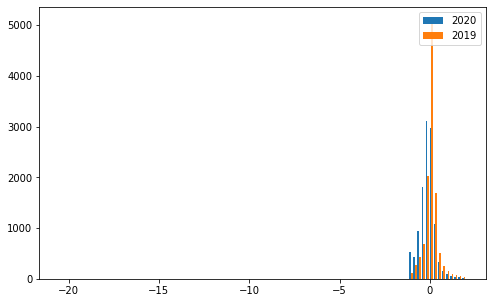

In [21]:
#df_2017['TOTAL INGRESOS'].hist(bins=100)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))
#df_ingresos=df_ingresos[~df_ingresos.isin([np.nan, np.inf, -np.inf]).any(1)]
ax.hist([df_ingresos['inter_2020'][df_ingresos['inter_2020'].lt(2)],df_ingresos['inter_2019'][df_ingresos['inter_2019'].lt(2)]],100,label=['2020', '2019'])
plt.legend(loc='upper right')

Se puede ver una comparacion entre el crecimiento de 2018,2019 y 2020

<AxesSubplot:>

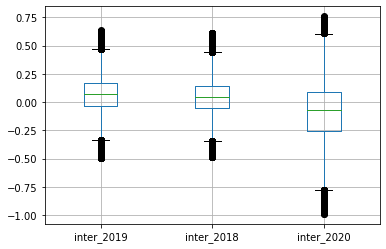

In [22]:
cols = ['inter_2019', 'inter_2018','inter_2020']
Q1 = df_ingresos[cols].quantile(0.25)
Q3 = df_ingresos[cols].quantile(0.75)
IQR = Q3 - Q1

df_ingresos_no_out = df_ingresos[~((df_ingresos[cols] < (Q1 - 1.5 * IQR)) |(df_ingresos[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_ingresos_no_out.boxplot(column=[ 'inter_2019', 'inter_2018','inter_2020'])

En el siguiente grafico se puede ver como existe un desbalanceo de clases, con pocos registros de empresas de alto crecimiento.

<AxesSubplot:>

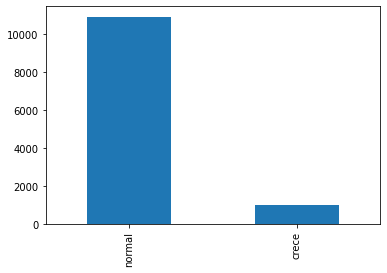

In [23]:
df_ingresos['crecimiento_sin_20_class'].value_counts().plot(kind='bar')

In [24]:
df_ingresos['crecimiento_sin_20_class'].value_counts(normalize=True)

normal    0.917081
crece     0.082919
Name: crecimiento_sin_20_class, dtype: float64

In [25]:
df_ingresos['crecimiento_sin_20_class'].value_counts()

normal    10894
crece       985
Name: crecimiento_sin_20_class, dtype: int64

<AxesSubplot:>

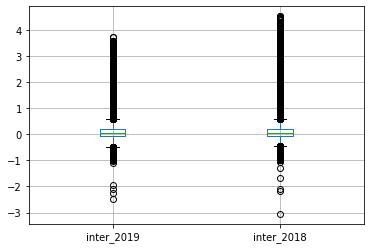

In [26]:
cols = ['inter_2019', 'inter_2018'] # one or more

Q1 = df_ingresos[cols].quantile(0.05)
Q3 = df_ingresos[cols].quantile(0.95)
IQR = Q3 - Q1

df_ingresos = df_ingresos[~((df_ingresos[cols] < (Q1 - 1.5 * IQR)) |(df_ingresos[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


df_ingresos.boxplot(column=[ 'inter_2019', 'inter_2018'])

In [27]:
df_ingresos['crecimiento_sin_20_class'].value_counts()

normal    10513
crece       886
Name: crecimiento_sin_20_class, dtype: int64

Se mantienen solo los campos calculados y las clases generadas.

In [28]:
df_ingresos = df_ingresos[['ID_2017','inter_2020', 'inter_2019', 'inter_2018','crecimiento','crecimiento_sin_20_class']]

In [29]:
df_ingresos

,ID_2017,inter_2020,inter_2019,inter_2018,crecimiento,crecimiento_sin_20_class
0,233151,-0.070846,0.211775,-0.174742,normal,normal
1,233207,-0.150616,0.082453,0.187696,normal,normal
2,233235,0.298777,-0.028447,0.102274,normal,normal
3,233284,-0.002528,0.085257,-0.010283,normal,normal
4,233291,0.020146,0.172139,0.028699,normal,normal
...,...,...,...,...,...,...
11872,21205853624,0.082773,0.169401,0.022417,normal,normal
11874,21208275647,-0.015485,-0.215965,-0.830785,normal,normal
11876,21210026868,-0.575117,-0.218506,1.066881,normal,normal
11877,21218950779,-0.385842,-0.240136,0.495874,normal,normal


Se integra la categoria de crecimiento al dataset total

In [30]:
df_total=df_total.merge(df_ingresos,left_on='ID_2017',right_on='ID_2017')

Se divide el dataset de contratos por años.

In [31]:
df_contratos_2017  = df_contratos.loc[df_contratos['Año'].eq(2017)]
df_contratos_2018  = df_contratos.loc[df_contratos['Año'].eq(2018)]
df_contratos_2019  = df_contratos.loc[df_contratos['Año'].eq(2019)]
df_contratos_2020  = df_contratos.loc[df_contratos['Año'].eq(2020)]

df_contratos_2017.columns = df_contratos_2017.columns.map(lambda x: str(x) + '_2017')
df_contratos_2018.columns = df_contratos_2018.columns.map(lambda x: str(x) + '_2018')
df_contratos_2019.columns = df_contratos_2019.columns.map(lambda x: str(x) + '_2019')
df_contratos_2020.columns = df_contratos_2020.columns.map(lambda x: str(x) + '_2020')


Se verifica que no existan registros duplicados

In [32]:
 df_contratos_2017[df_contratos_2017.duplicated('ID_2017')]

,ID_2017,Año_2017,Cuantia_2017,Contratos_2017


Se integran los contratos al dataset total

In [33]:
df_total = df_total.merge(df_contratos_2017,how='left',left_on='ID_2017',right_on='ID_2017')
df_total = df_total.merge(df_contratos_2018,how='left',left_on='ID_2017',right_on='ID_2018')
df_total = df_total.merge(df_contratos_2019,how='left',left_on='ID_2017',right_on='ID_2019')
df_total = df_total.merge(df_contratos_2020,how='left',left_on='ID_2017',right_on='ID_2020')

In [34]:
 df_total.head()

,ID_2017,ACC_2017,ACC11H_2017,ACC113_2017,ACC114_2017,ACC118_2017,ACC211_2017,ACL_2017,PSC_2017,PSC224_2017,...,Cuantia_2018,Contratos_2018,ID_2019_y,Año_2019,Cuantia_2019,Contratos_2019,ID_2020_y,Año_2020,Cuantia_2020,Contratos_2020
0,233151,6871877.0,750592.0,2989104.0,361650.0,595921.0,2174610.0,5447302.0,4785191.0,320181.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,233207,3385418.0,2882.0,1088517.0,1625805.0,0.0,668214.0,4659870.0,895625.0,156635.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,233235,3208016.0,35102.0,3109290.0,0.0,0.0,63624.0,9082630.0,638492.0,465787.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,233284,46855911.0,1448086.0,25698164.0,12107954.0,155569.0,7446138.0,25528454.0,31303276.0,1291768.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,233291,15604345.0,1034671.0,9692753.0,4684702.0,0.0,192219.0,34532109.0,11192661.0,189271.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se puede observar mediante el histograma, que la mayoria de registros no tienen contratos.
#Se podria convertir a categorica?

<AxesSubplot:>

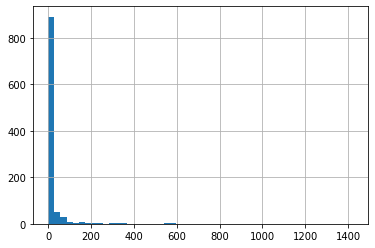

In [35]:
df_total['Contratos_2017'].hist(bins=50)

Se elimina los datos duplicados del dataset de datos de la empresa

In [36]:
df_datos_empresa=df_datos_empresa.drop_duplicates(subset=['ID'])
df_datos_empresa[df_datos_empresa.duplicated('ID')]

,ID,TIPOLOGIA,EMPLEADOS,CONSEJOAPRO,OBJETOSOCIAL,CIIU,CONSTITUCION,VIGENCIA,ESTADO,TIPOSOC,DEPARTAMENTO,LOCALIDAD,PAISMATRIZ,AUDITOR,INFORMEAUDITORIA,OPINIONAUDITOR,PARTICIPACIONES


Se integra al dataset principal

In [37]:
df_total = df_total.merge(df_datos_empresa,how='left',left_on='ID_2017',right_on='ID')
df_total.head(5)

,ID_2017,ACC_2017,ACC11H_2017,ACC113_2017,ACC114_2017,ACC118_2017,ACC211_2017,ACL_2017,PSC_2017,PSC224_2017,...,VIGENCIA,ESTADO,TIPOSOC,DEPARTAMENTO,LOCALIDAD,PAISMATRIZ,AUDITOR,INFORMEAUDITORIA,OPINIONAUDITOR,PARTICIPACIONES
0,233151,6871877.0,750592.0,2989104.0,361650.0,595921.0,2174610.0,5447302.0,4785191.0,320181.0,...,NaN,ACTIVA,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,NaN,Si,Si,03. LIMPIO,No
1,233207,3385418.0,2882.0,1088517.0,1625805.0,0.0,668214.0,4659870.0,895625.0,156635.0,...,NaN,ACTIVA,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,NaN,Si,Si,03. LIMPIO,No
2,233235,3208016.0,35102.0,3109290.0,0.0,0.0,63624.0,9082630.0,638492.0,465787.0,...,NaN,ACTIVA,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,NaN,Si,Si,03. LIMPIO,NaN
3,233284,46855911.0,1448086.0,25698164.0,12107954.0,155569.0,7446138.0,25528454.0,31303276.0,1291768.0,...,NaN,ACTIVA,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,NaN,Si,Si,03. LIMPIO,No
4,233291,15604345.0,1034671.0,9692753.0,4684702.0,0.0,192219.0,34532109.0,11192661.0,189271.0,...,NaN,ACTIVA,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,NaN,Si,Si,03. LIMPIO,No


In [38]:
df_total[df_total.duplicated('ID_2017')]

,ID_2017,ACC_2017,ACC11H_2017,ACC113_2017,ACC114_2017,ACC118_2017,ACC211_2017,ACL_2017,PSC_2017,PSC224_2017,...,VIGENCIA,ESTADO,TIPOSOC,DEPARTAMENTO,LOCALIDAD,PAISMATRIZ,AUDITOR,INFORMEAUDITORIA,OPINIONAUDITOR,PARTICIPACIONES


Se separa el dataset de casos judiciales en sus correspondientes años.

In [39]:
df_rama_judicial_2017  = df_rama_judicial.loc[df_rama_judicial['AÑO'].eq(2017)]
df_rama_judicial_2018  = df_rama_judicial.loc[df_rama_judicial['AÑO'].eq(2018)]
df_rama_judicial_2019  = df_rama_judicial.loc[df_rama_judicial['AÑO'].eq(2019)]

In [40]:
df_rama_judicial_2017.columns = df_rama_judicial_2017.columns.map(lambda x: str(x) + '_2017')
df_rama_judicial_2018.columns = df_rama_judicial_2018.columns.map(lambda x: str(x) + '_2018')
df_rama_judicial_2019.columns = df_rama_judicial_2019.columns.map(lambda x: str(x) + '_2019')

Se suman todos los casos judiciales para tener un registro por empresa por año.

In [41]:
df_rama_judicial_2017=df_rama_judicial_2017.groupby(['ID_2017'],as_index=False).sum()
df_rama_judicial_2018=df_rama_judicial_2018.groupby(['ID_2018'],as_index=False).sum()
df_rama_judicial_2019=df_rama_judicial_2019.groupby(['ID_2019'],as_index=False).sum()

In [42]:
df_rama_judicial_2017

,ID_2017,AÑO_2017,NUMINCIDENTES_2017
0,236266,2017,1
1,238688,2017,1
2,239332,2017,2
3,240557,2017,1
4,240578,2017,1
...,...,...,...
433,21002367991,2017,1
434,21009203215,2017,1
435,21020335855,2017,1
436,21065382586,2017,1


In [43]:
df_rama_judicial_2017[df_rama_judicial_2017.duplicated('ID_2017')]

,ID_2017,AÑO_2017,NUMINCIDENTES_2017


Se integra el dataset de los casos judiciales al dataset principal.

In [44]:
df_total = df_total.merge(df_rama_judicial_2017,how='left',left_on='ID_2017',right_on='ID_2017')
df_total = df_total.merge(df_rama_judicial_2018,how='left',left_on='ID_2017',right_on='ID_2018')
df_total = df_total.merge(df_rama_judicial_2019,how='left',left_on='ID_2017',right_on='ID_2019')

In [45]:
df_total[df_total.duplicated('ID_2017')]

,ID_2017,ACC_2017,ACC11H_2017,ACC113_2017,ACC114_2017,ACC118_2017,ACC211_2017,ACL_2017,PSC_2017,PSC224_2017,...,OPINIONAUDITOR,PARTICIPACIONES,AÑO_2017,NUMINCIDENTES_2017,ID_2018,AÑO_2018,NUMINCIDENTES_2018,ID_2019,AÑO_2019,NUMINCIDENTES_2019


In [46]:
df_modificacion_statutos.head()

,ID,AÑOPUBLICACION,PUBLICACIONES
0,381800313,2017,4
1,69495050,2018,4
2,21000198854,2018,2
3,310320173,2019,8
4,2126217,2018,1


Para el dataset del numero de modificaciones de estatutos, se separan los registros por año, se etiquetan y se agrupa el numero de publicaciones por año.

In [47]:
df_modificacion_statutos_2017  = df_modificacion_statutos.loc[df_modificacion_statutos['AÑOPUBLICACION'].eq(2017)]
df_modificacion_statutos_2018  = df_modificacion_statutos.loc[df_modificacion_statutos['AÑOPUBLICACION'].eq(2018)]
df_modificacion_statutos_2019  = df_modificacion_statutos.loc[df_modificacion_statutos['AÑOPUBLICACION'].eq(2019)]

df_modificacion_statutos_2017.columns = df_modificacion_statutos_2017.columns.map(lambda x: str(x) + '_2017')
df_modificacion_statutos_2018.columns = df_modificacion_statutos_2018.columns.map(lambda x: str(x) + '_2018')
df_modificacion_statutos_2019.columns = df_modificacion_statutos_2019.columns.map(lambda x: str(x) + '_2019')

df_modificacion_statutos_2017=df_modificacion_statutos_2017.groupby(['ID_2017'],as_index=False).sum()
df_modificacion_statutos_2018=df_modificacion_statutos_2018.groupby(['ID_2018'],as_index=False).sum()
df_modificacion_statutos_2019=df_modificacion_statutos_2019.groupby(['ID_2019'],as_index=False).sum()

Se integra al dataset principal.

In [48]:
df_total = df_total.merge(df_modificacion_statutos_2017,how='left',left_on='ID_2017',right_on='ID_2017')
df_total = df_total.merge(df_modificacion_statutos_2018,how='left',left_on='ID_2017',right_on='ID_2018')
df_total = df_total.merge(df_modificacion_statutos_2019,how='left',left_on='ID_2017',right_on='ID_2019')

In [49]:
df_total

,ID_2017,ACC_2017,ACC11H_2017,ACC113_2017,ACC114_2017,ACC118_2017,ACC211_2017,ACL_2017,PSC_2017,PSC224_2017,...,AÑO_2019,NUMINCIDENTES_2019,AÑOPUBLICACION_2017,PUBLICACIONES_2017,ID_2018_y,AÑOPUBLICACION_2018,PUBLICACIONES_2018,ID_2019_y,AÑOPUBLICACION_2019,PUBLICACIONES_2019
0,233151,6871877.0,750592.0,2989104.0,361650.0,595921.0,2174610.0,5447302.0,4785191.0,320181.0,...,NaN,NaN,NaN,NaN,2.331510e+05,2018.0,3.0,2.331510e+05,2019.0,7.0
1,233207,3385418.0,2882.0,1088517.0,1625805.0,0.0,668214.0,4659870.0,895625.0,156635.0,...,NaN,NaN,2017.0,2.0,NaN,NaN,NaN,2.332070e+05,2019.0,2.0
2,233235,3208016.0,35102.0,3109290.0,0.0,0.0,63624.0,9082630.0,638492.0,465787.0,...,NaN,NaN,NaN,NaN,2.332350e+05,2018.0,2.0,2.332350e+05,2019.0,2.0
3,233284,46855911.0,1448086.0,25698164.0,12107954.0,155569.0,7446138.0,25528454.0,31303276.0,1291768.0,...,NaN,NaN,2017.0,1.0,2.332840e+05,2018.0,1.0,2.332840e+05,2019.0,5.0
4,233291,15604345.0,1034671.0,9692753.0,4684702.0,0.0,192219.0,34532109.0,11192661.0,189271.0,...,NaN,NaN,2017.0,2.0,NaN,NaN,NaN,2.332910e+05,2019.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,21205853624,2563400.0,0.0,626179.0,1822767.0,0.0,114454.0,9975657.0,11203413.0,687113.0,...,NaN,NaN,2017.0,1.0,2.120585e+10,2018.0,6.0,2.120585e+10,2019.0,2.0
11395,21208275647,508061.0,0.0,459340.0,0.0,0.0,48721.0,22234668.0,188556.0,42479.0,...,NaN,NaN,2017.0,2.0,NaN,NaN,NaN,2.120828e+10,2019.0,6.0
11396,21210026868,29590722.0,653613.0,15709036.0,11234689.0,245483.0,1747901.0,1120302.0,29693596.0,520788.0,...,NaN,NaN,2017.0,1.0,2.121003e+10,2018.0,8.0,2.121003e+10,2019.0,2.0
11397,21218950779,2088202.0,0.0,9721.0,0.0,1705928.0,372553.0,17654128.0,6678224.0,230090.0,...,NaN,NaN,2017.0,2.0,2.121895e+10,2018.0,5.0,NaN,NaN,NaN


Se eliminan los campos que se usaron para los joins de datasets y los que tienen datos de años

In [50]:
df_total=df_total.drop(['ID_2018_y','ID_2019_y','ID_2019_x','ID_2020_x','ID_2018_x','ID_2017'],axis=1)

In [51]:
df_total=df_total.drop(['Año_2018','Año_2019','Año_2020','Año_2017','AÑO_2017','AÑO_2018','AÑO_2019','ID_2020_y'],axis=1)

In [52]:
df_total=df_total.drop(['AÑOPUBLICACION_2017','AÑOPUBLICACION_2018','AÑOPUBLICACION_2019'],axis=1)

In [53]:
df_total = df_total.drop('RAIE_2017', 1)
df_total = df_total.drop('RAIE_2018', 1)
df_total = df_total.drop('RAIE_2019', 1)
df_total = df_total.drop('RAIE_2020', 1)

Se vuelve a comprobar los campos nulos para los datos integrados.

In [54]:
percent_missing = df_total.isnull().sum() * 100 / len(df_total)
missing_value_df = pd.DataFrame({'column_name': df_total.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)


with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(missing_value_df)

,column_name,percent_missing
PAISMATRIZ,PAISMATRIZ,97.973506
NUMINCIDENTES_2017,NUMINCIDENTES_2017,96.350557
NUMINCIDENTES_2018,NUMINCIDENTES_2018,95.639968
NUMINCIDENTES_2019,NUMINCIDENTES_2019,95.420651
Cuantia_2020,Cuantia_2020,95.411878
Contratos_2020,Contratos_2020,95.411878
Contratos_2018,Contratos_2018,91.744890
Cuantia_2018,Cuantia_2018,91.744890
Cuantia_2019,Cuantia_2019,91.464164
Contratos_2019,Contratos_2019,91.464164


Ahora se muestra un resumen de los campos categoricos, se va a ir analizando cada campo para ver si es relevante en relacion al crecimiento.

In [55]:
 df_total.describe(include='object')

,crecimiento,crecimiento_sin_20_class,TIPOLOGIA,CONSEJOAPRO,OBJETOSOCIAL,CIIU,VIGENCIA,ESTADO,TIPOSOC,DEPARTAMENTO,LOCALIDAD,PAISMATRIZ,AUDITOR,INFORMEAUDITORIA,OPINIONAUDITOR,PARTICIPACIONES
count,11399,11399,11399,11399,11397,11399,4451,11399,11399,11399,11398,231,11399,11026,10879,9456
unique,2,2,5,2,9369,387,3182,4,8,30,257,41,2,2,4,2
top,normal,normal,SOCIEDAD COMERCIAL/INDUSTRIAL,Si,ACTIVIDADES INMOBILIARIAS REALIZADAS CON BIENE...,L6810 - Actividades inmobiliarias realizadas c...,2050-12-31 00:00:00,ACTIVA,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,249 - ESTADOS UNIDOS,Si,Si,03. LIMPIO,No
freq,11115,10513,11148,9028,82,1440,305,11379,6940,5402,4507,55,11270,10879,10720,7800


Se puede ver que las empresas de alto crecimiento estan distribuidas en sociedades comerciales y entidades extrajeras.

<AxesSubplot:xlabel='count', ylabel='TIPOLOGIA'>

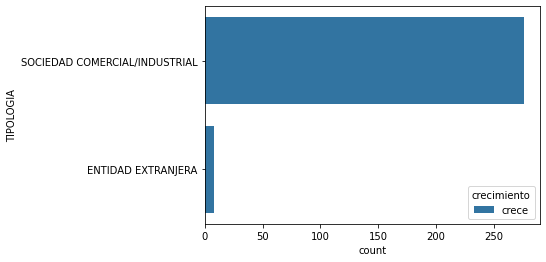

In [56]:
sns.countplot(y="TIPOLOGIA", hue="crecimiento",  data=df_total[df_total['crecimiento']=='crece'])

<AxesSubplot:xlabel='count', ylabel='CONSEJOAPRO'>

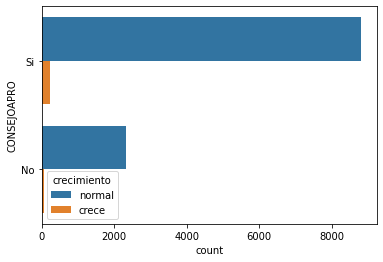

In [57]:
sns.countplot(y="CONSEJOAPRO", hue="crecimiento", data=df_total)

ACTIVA                         0.998245
ACUERDO DE REESTRUCTURACIÓN    0.001053
EN ETAPA PREOPERATIVA          0.000351
ACUERDO DE REORGANIZACION      0.000351
Name: ESTADO, dtype: float64

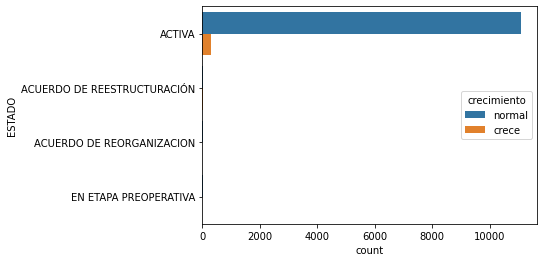

In [58]:
sns.countplot(y="ESTADO", hue="crecimiento", data=df_total)
df_total['ESTADO'].value_counts(normalize=True)


Al ser casi todos los registros de empresas activas s elimina este campo

In [59]:
df_total=df_total.drop(['ESTADO'],axis=1)

<AxesSubplot:xlabel='count', ylabel='TIPOSOC'>

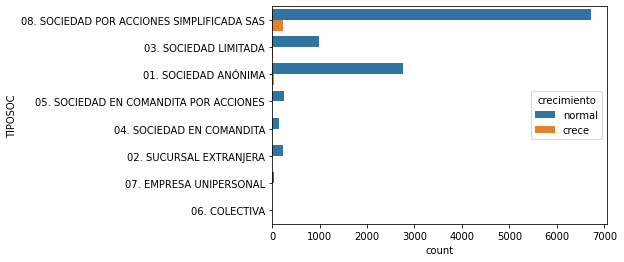

In [60]:

sns.countplot(y="TIPOSOC", hue="crecimiento", data=df_total)


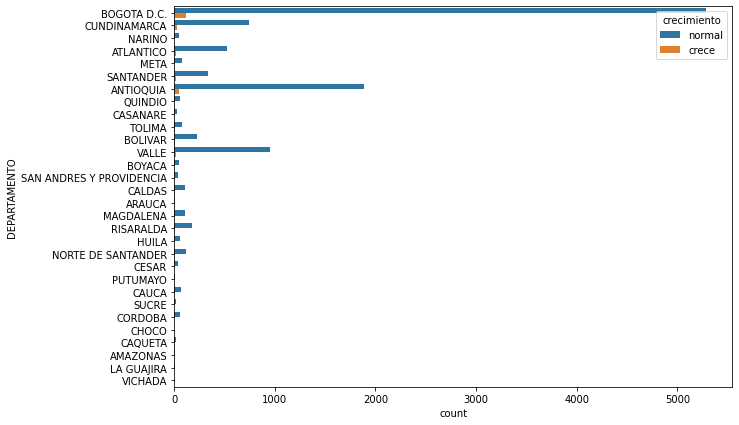

In [61]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(y="DEPARTAMENTO", hue="crecimiento", data=df_total)

<AxesSubplot:xlabel='count', ylabel='OPINIONAUDITOR'>

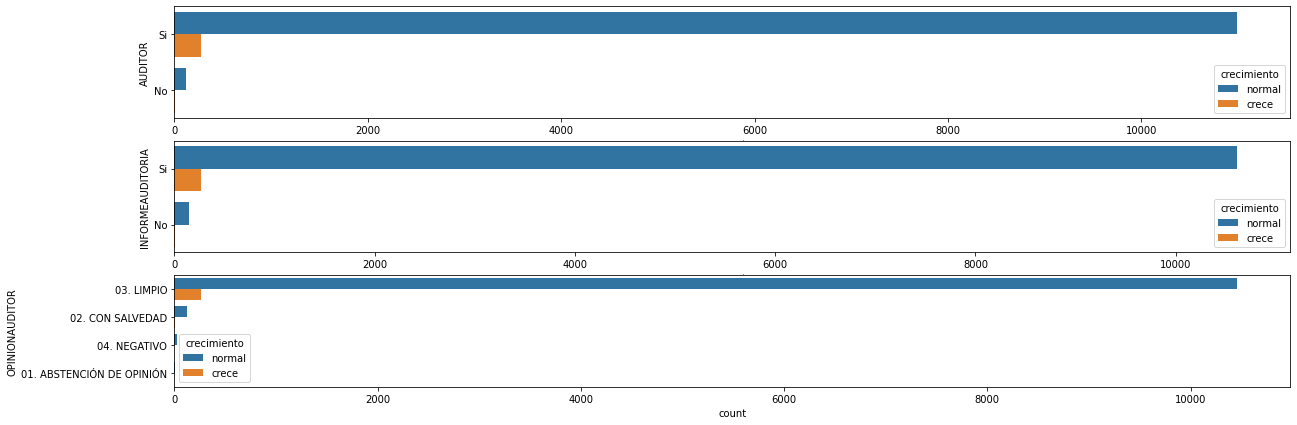

In [62]:
 fig,ax = plt.subplots(3,figsize = (20,7))
sns.countplot(ax=ax[0],y="AUDITOR", hue="crecimiento", data=df_total)
sns.countplot(ax=ax[1],y="INFORMEAUDITORIA", hue="crecimiento", data=df_total)
sns.countplot(ax=ax[2],y="OPINIONAUDITOR", hue="crecimiento", data=df_total)


<AxesSubplot:xlabel='count', ylabel='PAISMATRIZ'>

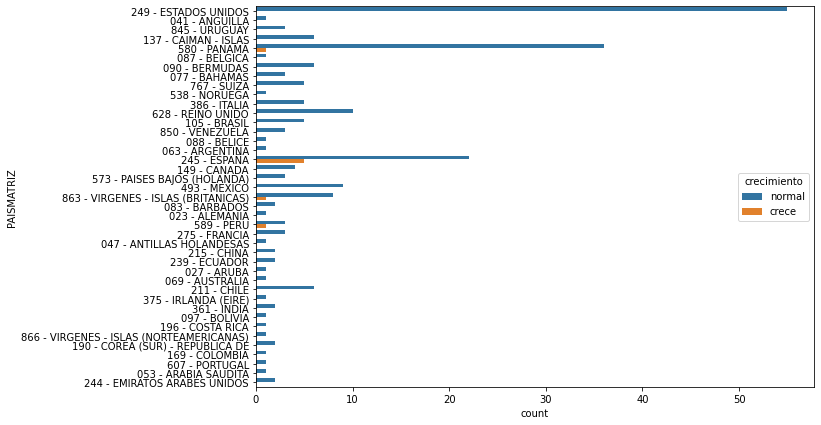

In [63]:
countplt, ax = plt.subplots(figsize = (10,7))

sns.countplot(y="PAISMATRIZ", hue="crecimiento", data=df_total)

Para los campos con valores nulos, se rellena el pais matriz con Colombia puesto que este dato tiene valores solo para los paises extrajeros. Para los demas valores numéricos se asume que si no tienen valores es porque son 0. Para los valores categoricos se rellena con la moda. Para el numero de empleados se llena con la mediana debido a que tiene valores outliers. Para la fecha de constitucion se tomo la mediana de las fechas de constitucion.

Se elimina los campos de vigencia porque contiene fechas al futuro y el objeto social porque en el campo CIIU se tiene mas estandarizado.

In [64]:
df_total['PAISMATRIZ']= df_total['PAISMATRIZ'].fillna('COLOMBIA')
df_total['NUMINCIDENTES_2017']= df_total['NUMINCIDENTES_2017'].fillna(0)
df_total['NUMINCIDENTES_2018']= df_total['NUMINCIDENTES_2018'].fillna(0)
df_total['NUMINCIDENTES_2019']= df_total['NUMINCIDENTES_2019'].fillna(0)
df_total['Cuantia_2020']= df_total['Cuantia_2020'].fillna(0)
df_total['Contratos_2020']= df_total['Contratos_2020'].fillna(0)
df_total['Cuantia_2018']= df_total['Cuantia_2018'].fillna(0)
df_total['Contratos_2018']= df_total['Contratos_2018'].fillna(0)
df_total['Cuantia_2019']= df_total['Cuantia_2019'].fillna(0)
df_total['Cuantia_2017']= df_total['Cuantia_2017'].fillna(0)
df_total['Contratos_2017']= df_total['Contratos_2017'].fillna(0)
df_total['Contratos_2019']= df_total['Contratos_2017'].fillna(0)
df_total['PUBLICACIONES_2017']= df_total['PUBLICACIONES_2017'].fillna(0)
df_total['PUBLICACIONES_2018']= df_total['PUBLICACIONES_2018'].fillna(0)
df_total['PUBLICACIONES_2019']= df_total['PUBLICACIONES_2019'].fillna(0)
df_total['PARTICIPACIONES']= df_total['PARTICIPACIONES'].fillna(df_total['PARTICIPACIONES'].mode()[0])
df_total['OPINIONAUDITOR']= df_total['OPINIONAUDITOR'].fillna(df_total['OPINIONAUDITOR'].mode()[0])
df_total['INFORMEAUDITORIA']= df_total['INFORMEAUDITORIA'].fillna(df_total['INFORMEAUDITORIA'].mode()[0])
df_total['EMPLEADOS']= df_total['EMPLEADOS'].fillna(df_total['EMPLEADOS'].median())
df_total['LOCALIDAD']= df_total['LOCALIDAD'].fillna(df_total['LOCALIDAD'].mode()[0])
df_total['Contratos_2019']= df_total['Contratos_2017'].fillna(0)

uniqueValues = df_total['CONSTITUCION'].unique()
df_total['CONSTITUCION']= df_total['CONSTITUCION'].fillna(uniqueValues[len(uniqueValues)//2])

df_total=df_total.drop(['VIGENCIA'],axis=1)
df_total=df_total.drop(['OBJETOSOCIAL'],axis=1)

Se eliminan las columnas correspondientes a datos del año 2020

In [65]:
spike_cols = [col for col in df_total.columns if '_2020' in col]
print(spike_cols)

df_total=df_total.drop(spike_cols,axis=1)

['ACC_2020', 'ACC11H_2020', 'ACC113_2020', 'ACC114_2020', 'ACC118_2020', 'ACC211_2020', 'ACL_2020', 'PSC_2020', 'PSC224_2020', 'PSC225_2020', 'PSC228_2020', 'PSL_2020', 'PSL228_2020', 'PTT131_2020', 'PTT133_2020', 'PTT237_2020', 'RAGE51_2020', 'RAGE55_2020', 'RAGXFI_2020', 'inter_2020', 'Cuantia_2020', 'Contratos_2020']


In [66]:
percent_missing = df_total.isnull().sum() * 100 / len(df_total)
missing_value_df = pd.DataFrame({'column_name': df_total.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)


with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
   display(missing_value_df)

,column_name,percent_missing
inter_2019,inter_2019,0.008773
ACC_2017,ACC_2017,0.000000
Contratos_2018,Contratos_2018,0.000000
Contratos_2017,Contratos_2017,0.000000
Cuantia_2017,Cuantia_2017,0.000000
crecimiento_sin_20_class,crecimiento_sin_20_class,0.000000
crecimiento,crecimiento,0.000000
inter_2018,inter_2018,0.000000
RAGXFI_2019,RAGXFI_2019,0.000000
RAGE55_2019,RAGE55_2019,0.000000


Se crea un campo calculado que corresponde a la antiguedad de las empresas y se elimina la fecha de constitucion.

In [67]:
df_total['antiguedad'] = 2021-df_total['CONSTITUCION'].dt.year
df_total=df_total.drop(['CONSTITUCION'],axis=1)
df_total=df_total.drop(['ID'],axis=1)

Se muestra una muestra del dataset final

In [68]:
#df_total.info()
df_total

,ACC_2017,ACC11H_2017,ACC113_2017,ACC114_2017,ACC118_2017,ACC211_2017,ACL_2017,PSC_2017,PSC224_2017,PSC225_2017,...,INFORMEAUDITORIA,OPINIONAUDITOR,PARTICIPACIONES,NUMINCIDENTES_2017,NUMINCIDENTES_2018,NUMINCIDENTES_2019,PUBLICACIONES_2017,PUBLICACIONES_2018,PUBLICACIONES_2019,antiguedad
0,6871877.0,750592.0,2989104.0,361650.0,595921.0,2174610.0,5447302.0,4785191.0,320181.0,110676.0,...,Si,03. LIMPIO,No,0.0,0.0,0.0,0.0,3.0,7.0,49
1,3385418.0,2882.0,1088517.0,1625805.0,0.0,668214.0,4659870.0,895625.0,156635.0,278335.0,...,Si,03. LIMPIO,No,0.0,0.0,0.0,2.0,0.0,2.0,49
2,3208016.0,35102.0,3109290.0,0.0,0.0,63624.0,9082630.0,638492.0,465787.0,3627.0,...,Si,03. LIMPIO,No,0.0,0.0,0.0,0.0,2.0,2.0,49
3,46855911.0,1448086.0,25698164.0,12107954.0,155569.0,7446138.0,25528454.0,31303276.0,1291768.0,749261.0,...,Si,03. LIMPIO,No,0.0,0.0,0.0,1.0,1.0,5.0,49
4,15604345.0,1034671.0,9692753.0,4684702.0,0.0,192219.0,34532109.0,11192661.0,189271.0,627063.0,...,Si,03. LIMPIO,No,0.0,0.0,0.0,2.0,0.0,2.0,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,2563400.0,0.0,626179.0,1822767.0,0.0,114454.0,9975657.0,11203413.0,687113.0,451617.0,...,Si,03. LIMPIO,No,0.0,0.0,0.0,1.0,6.0,2.0,5
11395,508061.0,0.0,459340.0,0.0,0.0,48721.0,22234668.0,188556.0,42479.0,0.0,...,Si,03. LIMPIO,No,0.0,0.0,0.0,2.0,0.0,6.0,14
11396,29590722.0,653613.0,15709036.0,11234689.0,245483.0,1747901.0,1120302.0,29693596.0,520788.0,196439.0,...,Si,03. LIMPIO,No,0.0,0.0,0.0,1.0,8.0,2.0,5
11397,2088202.0,0.0,9721.0,0.0,1705928.0,372553.0,17654128.0,6678224.0,230090.0,0.0,...,Si,03. LIMPIO,No,0.0,0.0,0.0,2.0,5.0,0.0,13


Se calculan los campos que corresponden a la variacion interanual de los atributos financieros.

In [70]:
spike_cols = [col for col in df_total.columns if '_2017' in col]
new_list = [s.replace("_2017", "") for s in spike_cols]
for attr in new_list:
    if (attr not in ['PT']):
        df_total[attr+"_INTER_2018"] = df_total.apply(lambda row : (row[attr+'_2018']-row[attr+'_2017'])/ ((1 if row[attr+'_2018']==0 else row[attr+'_2018'])  if row[attr+'_2017']==0 else row[attr+'_2017']) , axis = 1)
        df_total[attr+"_INTER_2019"] = df_total.apply(lambda row : (row[attr+'_2019']-row[attr+'_2018'])/ ((1 if row[attr+'_2019']==0 else row[attr+'_2019']) if row[attr+'_2018']==0 else row[attr+'_2018']) , axis = 1)
        #df_total[attr+"_MEAN"] = df_total[[attr+'_2017',attr+'_2018',attr+'_2019']].mean(axis=1) / df_total[['PT_2017','PT_2018','PT_2019']].mean(axis=1)
        #df_total[attr+"_MEAN"] =df_total.apply(lambda row : (row[attr+'_2017']/row['PT_2017'] + row[attr+'_2018']/row['PT_2018'] + row[attr+'_2019']/row['PT_2019'])/3 , axis = 1)

        
        df_total.pop(attr+'_2017')
        df_total.pop(attr+'_2018')
        df_total.pop(attr+'_2019')
        #df_total[attr+"_INTER_2018"] = df_total[attr+"_INTER_2018"].map(lambda i: np.log(i) if i > 0 else 0) 
        #df_total[attr+"_INTER_2019"] = df_total[attr+"_INTER_2019"].map(lambda i: np.log(i) if i > 0 else 0) 
    


Se eliminan los registros que tienen valores nulos o infinitos

In [71]:
df_total = df_total[~((df_total.isnull()).any(axis=1))]  
df_total = df_total[~((df_total==np.inf).any(axis=1))]  

df1 = df_total[(df_total==np.inf).any(axis=1)]
df1.shape

(0, 66)

In [72]:
#df_total.to_csv('file_name.csv')

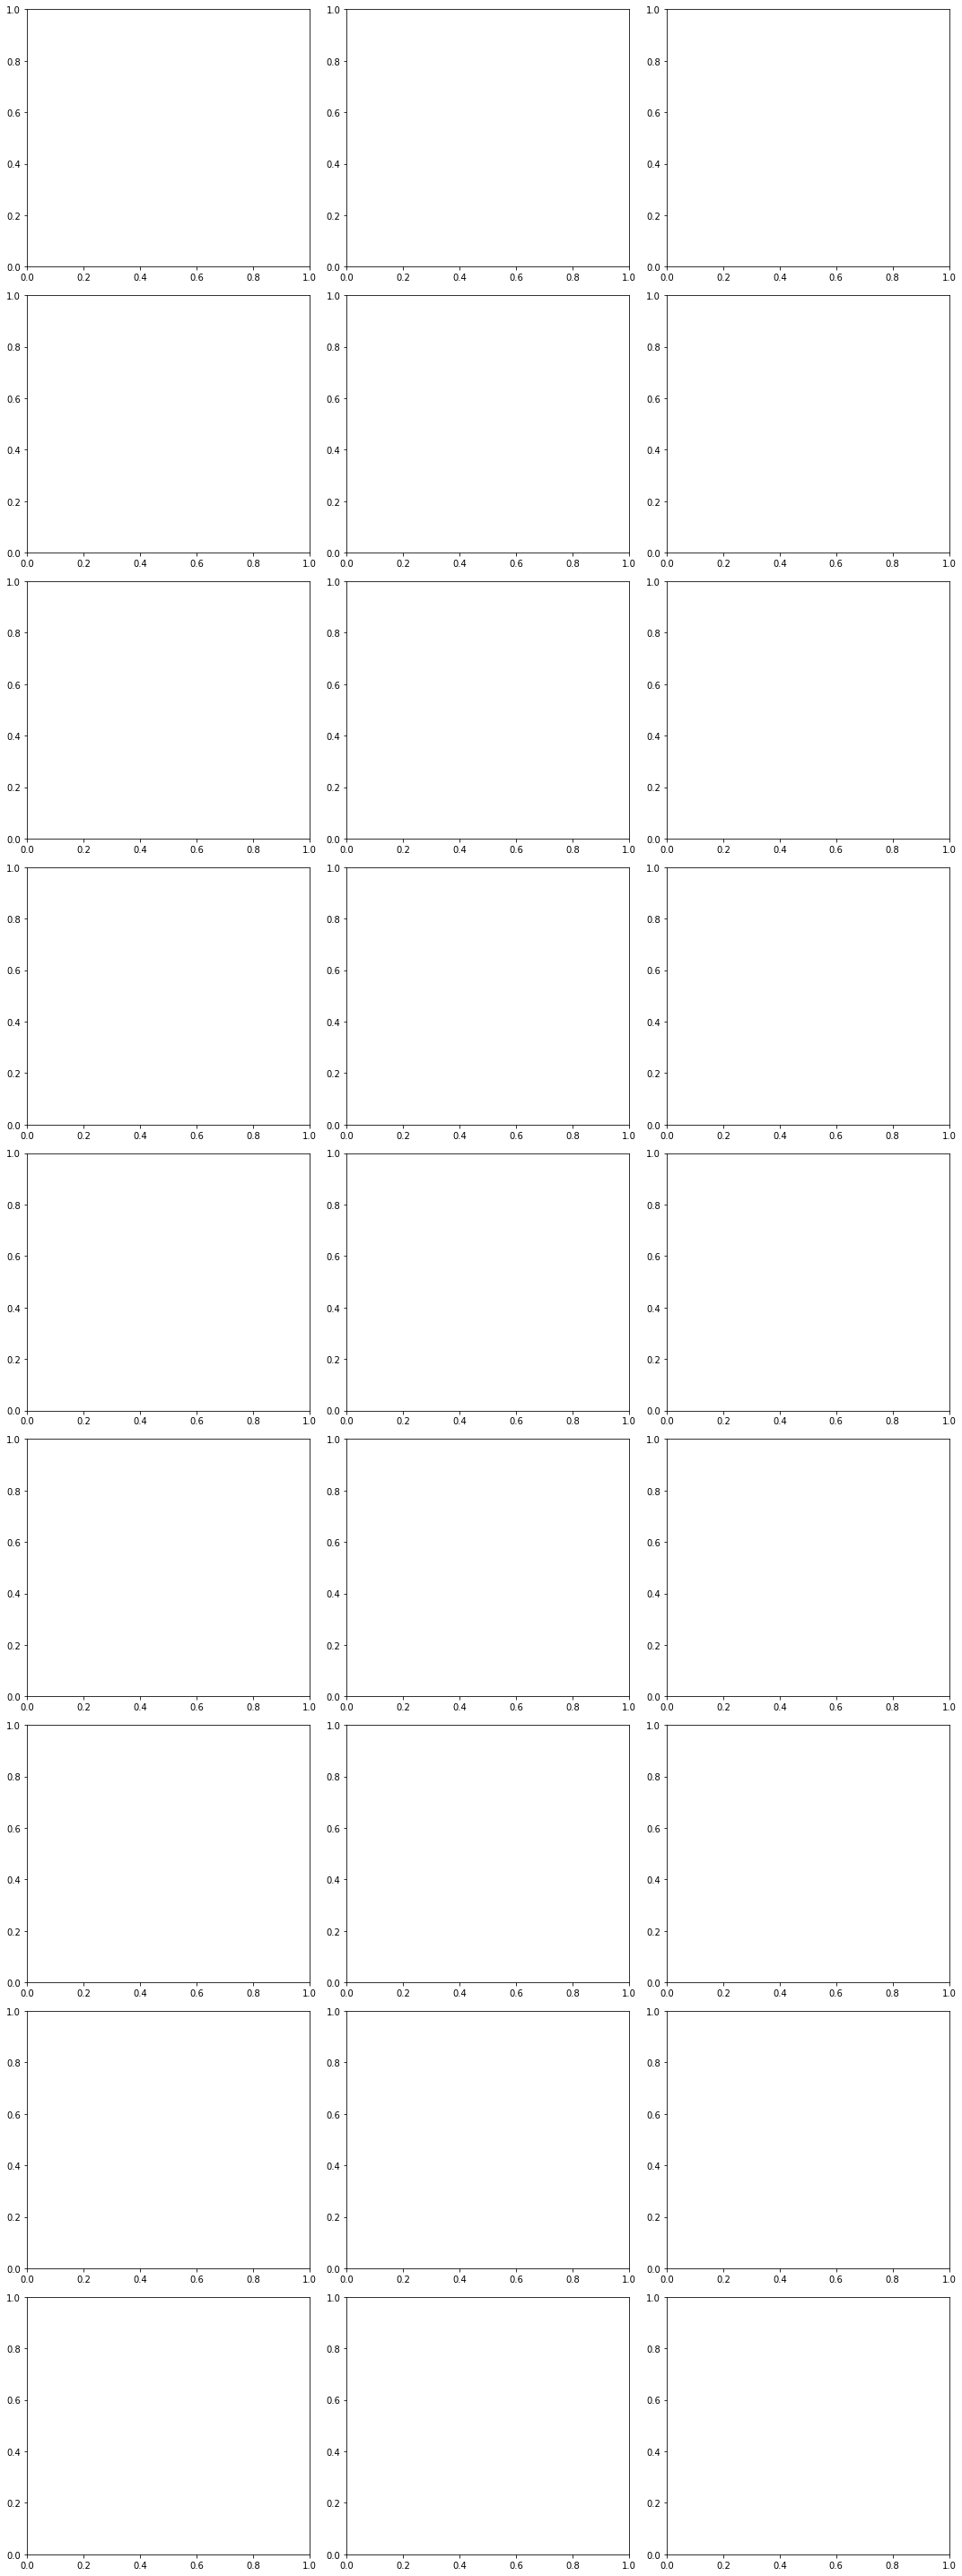

In [73]:
#newdf = df_total.select_dtypes(include=np.number)
#newdf

#fig, axes = plt.subplots(nrows = 9, ncols = 3)    # axes is 2d array (3x3)
#axes = axes.flatten()         # Convert axes to 1d array of length 9
#fig.set_size_inches(15, 40)
#plt.tight_layout()
#for ax, col in zip(axes, newdf.columns):
#  sns.distplot(newdf[col], ax = ax)
#  ax.set_title(col)


In [ ]:
Finalmente se aplicara un proceso de eliminacion de outliers, para todos los campos numericos.

In [74]:
import scipy.stats as stats
print(df_total.shape)

for i, column in enumerate(df_total.select_dtypes(include=[np.number]).columns, 1):
    if column not in (['inter_2018', 'inter_2019'
                                           #,'inter_2020'
                                           ,'crecimiento'
                                           ,'crecimiento_sin_20_class']):
        
        Q1 = df_total[column].quantile(0.02)
        Q3 = df_total[column].quantile(0.98)
        IQR = Q3 - Q1

        # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
        df_total = df_total.query('(@Q1 - 1.5 * @IQR) <= ' + column + ' <= (@Q3 + 1.5 * @IQR)')
        #print(column)
        #print(df_total.shape)
        
print(df_total.shape)


(11398, 66)
(7856, 66)


Ahora se resetea los indices de los registros.

In [75]:
df_total.reset_index(inplace = True, drop = True)

Se extrae las variables target del dataset completo

In [76]:
df2 = pd.concat([df_total.pop(x) for x in ['inter_2018', 'inter_2019'
                                           #,'inter_2020'
                                           ,'crecimiento'
                                           ,'crecimiento_sin_20_class',
                                           'PT_2017','PT_2018','PT_2019'
                                          ]], axis=1)

Para los campos categoricos se crean varibles codificadas correspondientes a cada categoria de un atributo

In [78]:
final= pd.get_dummies(df_total, columns= list(df_total.select_dtypes(include=['object']).columns))

In [79]:
final.head(5)

,EMPLEADOS,antiguedad,ACC_INTER_2018,ACC_INTER_2019,ACC11H_INTER_2018,ACC11H_INTER_2019,ACC113_INTER_2018,ACC113_INTER_2019,ACC114_INTER_2018,ACC114_INTER_2019,...,AUDITOR_No,AUDITOR_Si,INFORMEAUDITORIA_No,INFORMEAUDITORIA_Si,OPINIONAUDITOR_01. ABSTENCIÓN DE OPINIÓN,OPINIONAUDITOR_02. CON SALVEDAD,OPINIONAUDITOR_03. LIMPIO,OPINIONAUDITOR_04. NEGATIVO,PARTICIPACIONES_No,PARTICIPACIONES_Si
0,115.0,49,0.120485,0.026724,0.105135,-1.000000,0.186714,0.270361,-0.112492,-0.069275,...,0,1,0,1,0,0,1,0,1,0
1,2.0,49,-0.435378,0.275441,-1.000000,0.000000,-0.453379,0.104826,0.000000,0.000000,...,0,1,0,1,0,0,1,0,1,0
2,230.0,49,-0.046968,-0.021355,0.375236,-0.173821,0.125974,0.015887,-0.137729,0.105470,...,0,1,0,1,0,0,1,0,1,0
3,148.0,49,0.052519,0.171711,0.000796,0.323408,0.048630,0.186651,0.079794,0.034167,...,0,1,0,1,0,0,1,0,1,0
4,300.0,49,-0.061568,-0.049264,0.141612,0.076010,-0.073412,0.064851,-0.091854,-0.524141,...,0,1,0,1,0,0,1,0,1,0


Se obtiene la variable target y se estandariza las variables predictoras-

In [80]:
y=df2['crecimiento_sin_20_class']
y = y.map({'crece': 1, 'normal': 0}).astype(int)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


X_std = RobustScaler().fit_transform(final)
X_std = StandardScaler().fit_transform(final)

Se aplica un algoritmos que calcula la correlacion de cada atributo con la variable target y toma los mejores 500 atributos para la prediccion.

In [81]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=500)
selector.fit(X_std, y)

X_std = selector.transform(X_std)
#print(X_new.shape)

final.columns[selector.get_support(indices=True)]

# 1st way to get the list
vector_names = list(final.columns[selector.get_support(indices=True)])
print(vector_names)

['EMPLEADOS', 'antiguedad', 'ACC_INTER_2018', 'ACC_INTER_2019', 'ACC11H_INTER_2018', 'ACC11H_INTER_2019', 'ACC113_INTER_2018', 'ACC113_INTER_2019', 'ACC114_INTER_2018', 'ACC114_INTER_2019', 'ACC118_INTER_2018', 'ACC118_INTER_2019', 'ACC211_INTER_2018', 'ACC211_INTER_2019', 'ACL_INTER_2018', 'ACL_INTER_2019', 'PSC_INTER_2018', 'PSC_INTER_2019', 'PSC224_INTER_2018', 'PSC224_INTER_2019', 'PSC225_INTER_2018', 'PSC225_INTER_2019', 'PSC228_INTER_2018', 'PSC228_INTER_2019', 'PSL_INTER_2018', 'PSL228_INTER_2018', 'PSL228_INTER_2019', 'PTT131_INTER_2018', 'PTT131_INTER_2019', 'PTT133_INTER_2018', 'PTT133_INTER_2019', 'PTT237_INTER_2019', 'RAGE51_INTER_2018', 'RAGE51_INTER_2019', 'RAGE55_INTER_2018', 'RAGE55_INTER_2019', 'RAGXFI_INTER_2018', 'RAGXFI_INTER_2019', 'Cuantia_INTER_2019', 'Contratos_INTER_2018', 'NUMINCIDENTES_INTER_2018', 'PUBLICACIONES_INTER_2018', 'PUBLICACIONES_INTER_2019', 'TIPOLOGIA_EMPRESARIO INDIVIDUAL', 'TIPOLOGIA_ENTIDAD EXTRANJERA', 'TIPOLOGIA_SOCIEDAD COMERCIAL/INDUSTRIAL

Se divide el conjusto de datos por lo cual se separa el 10% de los registros para validacion y 90% para entrenamiento.

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_std, y, test_size=0.1)

Se realiza un proceso de under sampling aleatorio para tener un numero de registros balanceados en el conjunto de datos de validacion.

In [84]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1)
print('Resample dataset shape', Counter(y_val))
# fit predictor and target variable
X_val, y_val = rus.fit_resample(X_val, y_val)

print('Resample dataset shape', Counter(y_val))


Resample dataset shape Counter({0: 741, 1: 45})
Resample dataset shape Counter({0: 45, 1: 45})


Para compensar el desbalanceo de clases, se aplica un proceso de over sampling con el metodo SMOTE y luego de under sampling con el metodo Tomek links con esto de tiene una proporcion de 0.8 entre la clase mayoritaria y minoritaria.

In [85]:
from imblearn.combine import SMOTETomek
print('original dataset shape', Counter(y_train))
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'),sampling_strategy=0.8)

# fit predictor and target variable
X, y = resample.fit_resample(X_train, y_train)

print('Resample dataset shape', Counter(y))

original dataset shape Counter({0: 6598, 1: 472})
Resample dataset shape Counter({0: 6592, 1: 5278})


Como primer modelo se define un Bosque Aleatorio con 15 estimadores y maximo 5 de profundidad y tomando en cuenta el desbalanceo de clases.

In [86]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=15,max_depth=5,class_weight="balanced")

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X,y)

y_pred=clf.predict(X_val)

In [87]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.87      0.71        45
           1       0.76      0.42      0.54        45

    accuracy                           0.64        90
   macro avg       0.68      0.64      0.63        90
weighted avg       0.68      0.64      0.63        90



C:\Users\gabol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


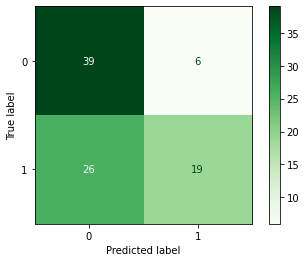

In [88]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_val, y_val,cmap='Greens')  

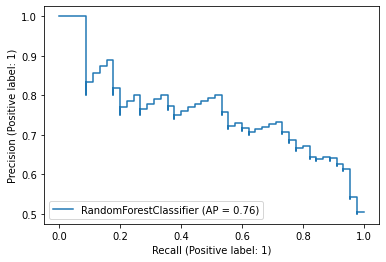

In [89]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(clf, X_val, y_val)

Aqui se listan las variables mas influyentes en la prediccion.

In [90]:
feature_imp = pd.Series(clf.feature_importances_,index=vector_names).sort_values(ascending=False)
feature_imp

TIPOSOC_01. SOCIEDAD ANÓNIMA                                                               0.091439
PSC_INTER_2018                                                                             0.065490
ACC_INTER_2018                                                                             0.063254
RAGE51_INTER_2018                                                                          0.054314
RAGE51_INTER_2019                                                                          0.053790
                                                                                             ...   
CIIU_N7911 - Actividades de las agencias de viaje                                          0.000000
CIIU_N7912 - Actividades de operadores turísticos                                          0.000000
CIIU_N7990 - Otros servicios de reserva y actividades relacionadas                         0.000000
CIIU_N8010 - Actividades de seguridad privada                                              0.000000


Ahora mediante un proceso de busqueda aleatoria se pretende encontrar los mejores hiperparametros para el algoritmo de random forest. Se valida el modelo mediante cross validation de 3 folds y se usa la metrica de recall y balance accuracy para saber cual es el mejor.

In [115]:
from sklearn.model_selection import RandomizedSearchCV
#model
MOD = RandomForestClassifier() 
#Implemente RandomSearchCV
m_params = { 
            "RF": {
                    "n_estimators" : np.linspace(2, 20, 20, dtype = "int"),  
                    "max_depth":np.linspace(1, 15, 15, dtype = "int"), 
                    "min_samples_split": np.linspace(2, 10, 5, dtype = "int"),  
                    "max_features": ["sqrt", "log2",10, 20, None],
                    "oob_score": [True],
                    "bootstrap": [True]
                    },
            }
scoreFunction = {"recall": "recall", "balanced_accuracy": "balanced_accuracy"}
random_search = RandomizedSearchCV(MOD,
                                       param_distributions = m_params["RF"], 
                                       n_iter = 50,
                                       scoring = scoreFunction,               
                                       refit = "balanced_accuracy",
                                       return_train_score = True,
                                       random_state = 42,
                                       cv = 3,
                                        verbose = 2 ) 

    #trains and optimizes the model
random_search.fit(X, y)

    #recover the best model
MOD = random_search.best_estimator_


Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=15, max_features=10, min_samples_split=8, n_estimators=11, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=15, max_features=10, min_samples_split=8, n_estimators=11, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=15, max_features=10, min_samples_split=8, n_estimators=11, oob_score=True; total time=   0.2s
[CV] END bootstrap=True, max_depth=2, max_features=20, min_samples_split=8, n_estimators=2, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=20, min_samples_split=8, n_estimators=2, oob_score=True; total time=   0.0s

C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



[CV] END bootstrap=True, max_depth=2, max_features=20, min_samples_split=8, n_estimators=2, oob_score=True; total time=   0.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=11, max_features=20, min_samples_split=10, n_estimators=11, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=11, max_features=20, min_samples_split=10, n_estimators=11, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=11, max_features=20, min_samples_split=10, n_estimators=11, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=11, max_features=10, min_samples_split=4, n_estimators=7, oob_score=True; total time=   0.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=11, max_features=10, min_samples_split=4, n_estimators=7, oob_score=True; total time=   0.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=11, max_features=10, min_samples_split=4, n_estimators=7, oob_score=True; total time=   0.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=11, max_features=log2, min_samples_split=10, n_estimators=12, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=11, max_features=log2, min_samples_split=10, n_estimators=12, oob_score=True; total time=   0.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=11, max_features=log2, min_samples_split=10, n_estimators=12, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=8, max_features=10, min_samples_split=8, n_estimators=13, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=8, max_features=10, min_samples_split=8, n_estimators=13, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=8, max_features=10, min_samples_split=8, n_estimators=13, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_split=10, n_estimators=13, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_split=10, n_estimators=13, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_split=10, n_estimators=13, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=12, max_features=10, min_samples_split=4, n_estimators=15, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=12, max_features=10, min_samples_split=4, n_estimators=15, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=12, max_features=10, min_samples_split=4, n_estimators=15, oob_score=True; total time=   0.2s
[CV] END bootstrap=True, max_depth=13, max_features=10, min_samples_split=8, n_estimators=6, oob_score=True; total time=   0.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=13, max_features=10, min_samples_split=8, n_estimators=6, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, max_depth=13, max_features=10, min_samples_split=8, n_estimators=6, oob_score=True; total time=   0.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=1, max_features=None, min_samples_split=8, n_estimators=7, oob_score=True; total time=   0.4s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=1, max_features=None, min_samples_split=8, n_estimators=7, oob_score=True; total time=   0.4s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=1, max_features=None, min_samples_split=8, n_estimators=7, oob_score=True; total time=   0.4s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=11, max_features=20, min_samples_split=4, n_estimators=15, oob_score=True; total time=   0.3s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=11, max_features=20, min_samples_split=4, n_estimators=15, oob_score=True; total time=   0.3s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=11, max_features=20, min_samples_split=4, n_estimators=15, oob_score=True; total time=   0.3s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=9, max_features=None, min_samples_split=4, n_estimators=7, oob_score=True; total time=   1.8s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=9, max_features=None, min_samples_split=4, n_estimators=7, oob_score=True; total time=   1.7s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=9, max_features=None, min_samples_split=4, n_estimators=7, oob_score=True; total time=   1.8s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_split=8, n_estimators=19, oob_score=True; total time=   0.5s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_split=8, n_estimators=19, oob_score=True; total time=   0.4s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_split=8, n_estimators=19, oob_score=True; total time=   0.4s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=13, max_features=10, min_samples_split=4, n_estimators=12, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=13, max_features=10, min_samples_split=4, n_estimators=12, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=13, max_features=10, min_samples_split=4, n_estimators=12, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=7, max_features=None, min_samples_split=6, n_estimators=5, oob_score=True; total time=   1.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=7, max_features=None, min_samples_split=6, n_estimators=5, oob_score=True; total time=   1.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=7, max_features=None, min_samples_split=6, n_estimators=5, oob_score=True; total time=   1.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=7, max_features=log2, min_samples_split=8, n_estimators=12, oob_score=True; total time=   0.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=7, max_features=log2, min_samples_split=8, n_estimators=12, oob_score=True; total time=   0.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=7, max_features=log2, min_samples_split=8, n_estimators=12, oob_score=True; total time=   0.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=6, max_features=None, min_samples_split=2, n_estimators=20, oob_score=True; total time=   3.9s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=6, max_features=None, min_samples_split=2, n_estimators=20, oob_score=True; total time=   3.7s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=6, max_features=None, min_samples_split=2, n_estimators=20, oob_score=True; total time=   3.9s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_split=4, n_estimators=11, oob_score=True; total time=   0.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_split=4, n_estimators=11, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_split=4, n_estimators=11, oob_score=True; total time=   0.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_split=10, n_estimators=6, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_split=10, n_estimators=6, oob_score=True; total time=   0.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_split=10, n_estimators=6, oob_score=True; total time=   0.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=15, max_features=None, min_samples_split=8, n_estimators=17, oob_score=True; total time=   4.9s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=15, max_features=None, min_samples_split=8, n_estimators=17, oob_score=True; total time=   5.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=15, max_features=None, min_samples_split=8, n_estimators=17, oob_score=True; total time=   5.4s
[CV] END bootstrap=True, max_depth=2, max_features=10, min_samples_split=8, n_estimators=10, oob_score=True; total time=   0.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=2, max_features=10, min_samples_split=8, n_estimators=10, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=10, min_samples_split=8, n_estimators=10, oob_score=True; total time=   0.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=20, min_samples_split=10, n_estimators=12, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=20, min_samples_split=10, n_estimators=12, oob_score=True; total time=   0.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=20, min_samples_split=10, n_estimators=12, oob_score=True; total time=   0.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=12, max_features=log2, min_samples_split=2, n_estimators=12, oob_score=True; total time=   0.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=12, max_features=log2, min_samples_split=2, n_estimators=12, oob_score=True; total time=   0.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=12, max_features=log2, min_samples_split=2, n_estimators=12, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=14, max_features=None, min_samples_split=6, n_estimators=10, oob_score=True; total time=   2.8s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=14, max_features=None, min_samples_split=6, n_estimators=10, oob_score=True; total time=   2.8s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=14, max_features=None, min_samples_split=6, n_estimators=10, oob_score=True; total time=   2.9s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=None, min_samples_split=4, n_estimators=14, oob_score=True; total time=   2.5s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=None, min_samples_split=4, n_estimators=14, oob_score=True; total time=   2.6s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=None, min_samples_split=4, n_estimators=14, oob_score=True; total time=   2.4s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=11, max_features=20, min_samples_split=2, n_estimators=12, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=11, max_features=20, min_samples_split=2, n_estimators=12, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=11, max_features=20, min_samples_split=2, n_estimators=12, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_split=6, n_estimators=12, oob_score=True; total time=   0.3s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_split=6, n_estimators=12, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_split=6, n_estimators=12, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=13, max_features=None, min_samples_split=4, n_estimators=2, oob_score=True; total time=   0.5s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=13, max_features=None, min_samples_split=4, n_estimators=2, oob_score=True; total time=   0.6s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=13, max_features=None, min_samples_split=4, n_estimators=2, oob_score=True; total time=   0.5s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_split=10, n_estimators=5, oob_score=True; total time=   0.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_split=10, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_split=10, n_estimators=5, oob_score=True; total time=   0.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_split=6, n_estimators=16, oob_score=True; total time=   0.3s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_split=6, n_estimators=16, oob_score=True; total time=   0.3s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_split=6, n_estimators=16, oob_score=True; total time=   0.3s
[CV] END bootstrap=True, max_depth=7, max_features=20, min_samples_split=10, n_estimators=6, oob_score=True; total time=   0.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=7, max_features=20, min_samples_split=10, n_estimators=6, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, max_depth=7, max_features=20, min_samples_split=10, n_estimators=6, oob_score=True; total time=   0.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=9, max_features=log2, min_samples_split=2, n_estimators=18, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=9, max_features=log2, min_samples_split=2, n_estimators=18, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=9, max_features=log2, min_samples_split=2, n_estimators=18, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=13, max_features=20, min_samples_split=10, n_estimators=17, oob_score=True; total time=   0.3s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=13, max_features=20, min_samples_split=10, n_estimators=17, oob_score=True; total time=   0.4s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=13, max_features=20, min_samples_split=10, n_estimators=17, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=20, min_samples_split=6, n_estimators=4, oob_score=True; total time=   0.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=20, min_samples_split=6, n_estimators=4, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=20, min_samples_split=6, n_estimators=4, oob_score=True; total time=   0.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=6, max_features=None, min_samples_split=2, n_estimators=5, oob_score=True; total time=   1.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=6, max_features=None, min_samples_split=2, n_estimators=5, oob_score=True; total time=   0.9s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=6, max_features=None, min_samples_split=2, n_estimators=5, oob_score=True; total time=   1.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=1, max_features=None, min_samples_split=8, n_estimators=15, oob_score=True; total time=   0.9s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=1, max_features=None, min_samples_split=8, n_estimators=15, oob_score=True; total time=   0.8s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=1, max_features=None, min_samples_split=8, n_estimators=15, oob_score=True; total time=   0.8s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=10, n_estimators=3, oob_score=True; total time=   0.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=10, n_estimators=3, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=10, n_estimators=3, oob_score=True; total time=   0.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=6, n_estimators=19, oob_score=True; total time=   0.3s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=6, n_estimators=19, oob_score=True; total time=   0.3s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=6, n_estimators=19, oob_score=True; total time=   0.3s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=8, oob_score=True; total time=   0.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=8, oob_score=True; total time=   0.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=8, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=10, min_samples_split=6, n_estimators=8, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=10, min_samples_split=6, n_estimators=8, oob_score=True; total time=   0.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=6, max_features=10, min_samples_split=6, n_estimators=8, oob_score=True; total time=   0.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=2, max_features=None, min_samples_split=8, n_estimators=16, oob_score=True; total time=   1.6s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=2, max_features=None, min_samples_split=8, n_estimators=16, oob_score=True; total time=   1.5s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=2, max_features=None, min_samples_split=8, n_estimators=16, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_depth=4, max_features=20, min_samples_split=2, n_estimators=7, oob_score=True; total time=   0.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=4, max_features=20, min_samples_split=2, n_estimators=7, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=20, min_samples_split=2, n_estimators=7, oob_score=True; total time=   0.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_split=10, n_estimators=10, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_split=10, n_estimators=10, oob_score=True; total time=   0.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_split=10, n_estimators=10, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_split=2, n_estimators=2, oob_score=True; total time=   0.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_split=2, n_estimators=2, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_split=2, n_estimators=2, oob_score=True; total time=   0.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=6, max_features=10, min_samples_split=4, n_estimators=15, oob_score=True; total time=   0.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=6, max_features=10, min_samples_split=4, n_estimators=15, oob_score=True; total time=   0.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=6, max_features=10, min_samples_split=4, n_estimators=15, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_split=2, n_estimators=6, oob_score=True; total time=   0.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_split=2, n_estimators=6, oob_score=True; total time=   0.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_split=2, n_estimators=6, oob_score=True; total time=   0.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_split=6, n_estimators=19, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_split=6, n_estimators=19, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_split=6, n_estimators=19, oob_score=True; total time=   0.2s
[CV] END bootstrap=True, max_depth=4, max_features=20, min_samples_split=10, n_estimators=20, oob_score=True; total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=4, max_features=20, min_samples_split=10, n_estimators=20, oob_score=True; total time=   0.3s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=4, max_features=20, min_samples_split=10, n_estimators=20, oob_score=True; total time=   0.3s
[CV] END bootstrap=True, max_depth=3, max_features=10, min_samples_split=8, n_estimators=8, oob_score=True; total time=   0.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=10, min_samples_split=8, n_estimators=8, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=10, min_samples_split=8, n_estimators=8, oob_score=True; total time=   0.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=14, max_features=None, min_samples_split=8, n_estimators=16, oob_score=True; total time=   4.4s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=14, max_features=None, min_samples_split=8, n_estimators=16, oob_score=True; total time=   4.5s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=14, max_features=None, min_samples_split=8, n_estimators=16, oob_score=True; total time=   4.3s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [116]:
random_search.best_params_

{'oob_score': True,
 'n_estimators': 17,
 'min_samples_split': 8,
 'max_features': None,
 'max_depth': 15,
 'bootstrap': True}

In [117]:
y_pred=MOD.predict(X_val)

In [118]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.98      0.73        45
           1       0.93      0.29      0.44        45

    accuracy                           0.63        90
   macro avg       0.75      0.63      0.58        90
weighted avg       0.75      0.63      0.58        90



C:\Users\gabol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


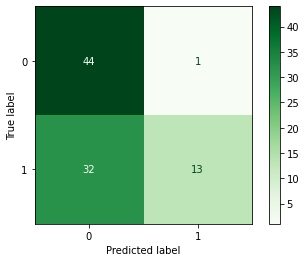

In [119]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(MOD, X_val, y_val,cmap='Greens') 

In [ ]:
PrecisionRecallDisplay.from_estimator(MOD, X_val, y_val)

Se realiza el mismo procedimiento para el algoritmo XGboost.

In [97]:
import xgboost as xgb
accuracy_lst_xgb = []
precision_lst_xgb = []
recall_lst_xgb = []
f1_lst_xgb = []
auc_lst_xgb = []

xgb_sm = xgb.XGBClassifier(random_state = 42)
xgb_params = {'eta' : [0.1,0.01,0.001],  # Learning rate
              'eval_metric': ['logloss'],
              'max_depth' : [3,6,9],
              'lambda' : [1,1.5,2],      # L2 regularization (higher values make model more conservative)
              'alpha' : [0,0.5,1]}        # L1 regularization (higher values make model more conservative)
              #'reg' : ['squarederror']}
              #'random_state': [42]}
scoreFunction = {"recall": "recall", "balanced_accuracy": "balanced_accuracy"}
     
rand_xgb = RandomizedSearchCV(xgb_sm,
                             
                                 param_distributions = xgb_params,
                                 n_iter = 4,
                                 cv = 3,
                                 refit = "balanced_accuracy",
                                 random_state = 42,
                                 return_train_score = True,
                                 scoring = scoreFunction,
                                 verbose=3)


rand_xgb.fit(X, y)

    #recover the best model
MOD = rand_xgb.best_estimator_

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END alpha=0.5, eta=0.1, eval_metric=logloss, lambda=1.5, max_depth=3; balanced_accuracy: (train=0.982, test=0.865) recall: (train=0.975, test=0.748) total time=   1.9s
[CV 2/3] END alpha=0.5, eta=0.1, eval_metric=logloss, lambda=1.5, max_depth=3; balanced_accuracy: (train=0.942, test=0.963) recall: (train=0.914, test=0.973) total time=   1.9s
[CV 3/3] END alpha=0.5, eta=0.1, eval_metric=logloss, lambda=1.5, max_depth=3; balanced_accuracy: (train=0.943, test=0.966) recall: (train=0.913, test=0.974) total time=   2.0s
[CV 1/3] END alpha=0, eta=0.1, eval_metric=logloss, lambda=1, max_depth=3; balanced_accuracy: (train=0.984, test=0.870) recall: (train=0.977, test=0.754) total time=   1.9s
[CV 2/3] END alpha=0, eta=0.1, eval_metric=logloss, lambda=1, max_depth=3; balanced_accuracy: (train=0.944, test=0.964) recall: (train=0.915, test=0.973) total time=   1.9s
[CV 3/3] END alpha=0, eta=0.1, eval_metric=logloss, lambda=1, m

In [ ]:
y_pred=MOD.predict(X_val)

In [ ]:
print(classification_report(y_val, y_pred))

In [ ]:
plot_confusion_matrix(MOD, X_val, y_val,cmap='Greens') 

In [ ]:
PrecisionRecallDisplay.from_estimator(MOD, X_val, y_val)

De la misma manera para el algoritmo SVM

In [127]:
from sklearn.svm import SVC as svc 
mdl = svc(probability = True, random_state = 1)
rand_list = {'C': [ 100, 1000], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}
scoreFunction = {"recall": "recall", "balanced_accuracy": "balanced_accuracy"}    
rand_search = RandomizedSearchCV(mdl, 
                                 param_distributions = rand_list,
                                 n_iter = 20,
                                 cv = 3,
                                 refit = "balanced_accuracy",
                                 random_state = 42,
                                 return_train_score = True,
                                 scoring = scoreFunction,
                                 verbose=3) 
rand_search.fit(X, y) 
mdl = random_search.best_estimator_
rand_search.cv_results_

C:\Users\gabol\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END C=100, gamma=1, kernel=rbf; balanced_accuracy: (train=1.000, test=0.729) recall: (train=1.000, test=0.458) total time= 3.3min
[CV 2/3] END C=100, gamma=1, kernel=rbf; balanced_accuracy: (train=1.000, test=0.722) recall: (train=1.000, test=0.444) total time= 3.2min
[CV 3/3] END C=100, gamma=1, kernel=rbf; balanced_accuracy: (train=1.000, test=0.708) recall: (train=1.000, test=0.416) total time= 3.1min
[CV 1/3] END C=100, gamma=0.1, kernel=rbf; balanced_accuracy: (train=1.000, test=0.899) recall: (train=1.000, test=0.799) total time= 2.7min
[CV 2/3] END C=100, gamma=0.1, kernel=rbf; balanced_accuracy: (train=1.000, test=0.903) recall: (train=1.000, test=0.807) total time= 2.7min
[CV 3/3] END C=100, gamma=0.1, kernel=rbf; balanced_accuracy: (train=1.000, test=0.898) recall: (train=1.000, test=0.799) total time= 2.6min
[CV 1/3] END C=100, gamma=0.01, kernel=rbf; balanced_accuracy: (train=1.000, test=0.971) recall: (tr

{'mean_fit_time': array([177.84701769, 148.55983758, 117.3455766 , 172.21874626,
        148.0392952 , 117.96270569]),
 'std_fit_time': array([4.66590809, 2.02966939, 1.6268704 , 2.41079234, 2.88899024,
        3.64990598]),
 'mean_score_time': array([15.80059703, 13.27893837,  7.21986826, 14.72778861, 12.66061028,
         7.11778482]),
 'std_score_time': array([0.93772698, 0.73352901, 0.10491156, 0.18091683, 0.12669966,
        0.03115512]),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[1, 0.1, 0.01, 1, 0.1, 0.01],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[100, 100, 100, 1000, 1000, 1000],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),

In [128]:
svc_mdl = rand_search.best_estimator_
y_pred=svc_mdl.predict(X_val)

In [129]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.96      0.66        45
           1       0.60      0.07      0.12        45

    accuracy                           0.51        90
   macro avg       0.55      0.51      0.39        90
weighted avg       0.55      0.51      0.39        90



C:\Users\gabol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


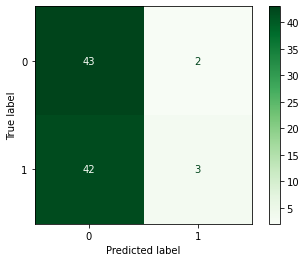

In [130]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc_mdl, X_val, y_val,cmap='Greens') 

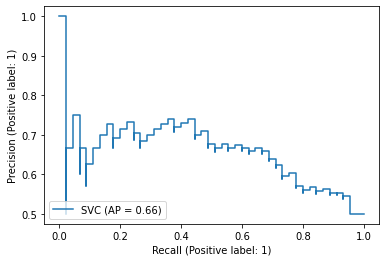

In [131]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(svc_mdl, X_val, y_val)

In [ ]:
Finalmente se aplica para el algoritmo de Regresion Logistica

In [120]:
from sklearn.linear_model import LogisticRegression
log_reg_sm = LogisticRegression()
#log_reg_params = {}
log_reg_params = {"penalty": ['l2'],
                  'C': [ 0.001, 0.01,0.1,1, 10, 100, 1000],
                  'solver':[ 'sag', 'saga'],
                 'multi_class':['auto', 'ovr']}

scoreFunction = {"recall": "recall", "balanced_accuracy": "balanced_accuracy"}    
log_reg_search = RandomizedSearchCV(log_reg_sm, 
                                 param_distributions = log_reg_params,
                                 n_iter = 20,
                                 cv = 3,
                                 refit = "balanced_accuracy",
                                 random_state = 42,
                                 return_train_score = True,
                                 scoring = scoreFunction,
                                 verbose=3) 
log_reg_search.fit(X, y) 
log_mdl = log_reg_search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=0.1, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.816, test=0.799) recall: (train=0.824, test=0.801) total time=   3.9s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=0.1, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.824, test=0.798) recall: (train=0.837, test=0.831) total time=   3.7s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=0.1, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.815, test=0.802) recall: (train=0.822, test=0.810) total time=   4.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=1000, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.816, test=0.799) recall: (train=0.826, test=0.802) total time=   4.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=1000, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.823, test=0.798) recall: (train=0.837, test=0.832) total time=   3.8s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=1000, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.816, test=0.802) recall: (train=0.823, test=0.811) total time=   3.7s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=0.1, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.815, test=0.799) recall: (train=0.822, test=0.798) total time=   3.3s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=0.1, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.821, test=0.799) recall: (train=0.834, test=0.828) total time=   3.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=0.1, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.815, test=0.799) recall: (train=0.821, test=0.806) total time=   3.5s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=100, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.816, test=0.799) recall: (train=0.826, test=0.802) total time=   4.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=100, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.823, test=0.798) recall: (train=0.837, test=0.832) total time=   4.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=100, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.816, test=0.802) recall: (train=0.823, test=0.811) total time=   4.1s
[CV 1/3] END C=0.001, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.783, test=0.775) recall: (train=0.736, test=0.730) total time=   0.6s
[CV 2/3] END C=0.001, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.788, test=0.775) recall: (train=0.747, test=0.746) total time=   0.7s
[CV 3/3] END C=0.001, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.789, test=0.765) recall: (train=0.745, test=0.716) total time=   0.8s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=1, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.816, test=0.798) recall: (train=0.825, test=0.800) total time=   3.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=1, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.822, test=0.797) recall: (train=0.835, test=0.829) total time=   3.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=1, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.815, test=0.800) recall: (train=0.822, test=0.809) total time=   3.3s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=10, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.816, test=0.799) recall: (train=0.826, test=0.802) total time=   3.9s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=10, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.823, test=0.798) recall: (train=0.837, test=0.832) total time=   3.9s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=10, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.816, test=0.802) recall: (train=0.823, test=0.811) total time=   3.7s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=100, multi_class=ovr, penalty=l2, solver=sag; balanced_accuracy: (train=0.816, test=0.799) recall: (train=0.825, test=0.800) total time=   3.4s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=100, multi_class=ovr, penalty=l2, solver=sag; balanced_accuracy: (train=0.822, test=0.798) recall: (train=0.835, test=0.830) total time=   3.3s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=100, multi_class=ovr, penalty=l2, solver=sag; balanced_accuracy: (train=0.815, test=0.800) recall: (train=0.822, test=0.808) total time=   3.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=0.1, multi_class=ovr, penalty=l2, solver=saga; balanced_accuracy: (train=0.816, test=0.799) recall: (train=0.824, test=0.801) total time=   3.7s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=0.1, multi_class=ovr, penalty=l2, solver=saga; balanced_accuracy: (train=0.824, test=0.798) recall: (train=0.837, test=0.831) total time=   4.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=0.1, multi_class=ovr, penalty=l2, solver=saga; balanced_accuracy: (train=0.815, test=0.802) recall: (train=0.822, test=0.810) total time=   3.9s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=1, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.816, test=0.798) recall: (train=0.825, test=0.800) total time=   4.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=1, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.823, test=0.798) recall: (train=0.837, test=0.832) total time=   5.7s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=1, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.816, test=0.802) recall: (train=0.823, test=0.811) total time=   4.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=1, multi_class=ovr, penalty=l2, solver=saga; balanced_accuracy: (train=0.816, test=0.798) recall: (train=0.825, test=0.800) total time=   4.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=1, multi_class=ovr, penalty=l2, solver=saga; balanced_accuracy: (train=0.823, test=0.798) recall: (train=0.837, test=0.832) total time=   3.8s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=1, multi_class=ovr, penalty=l2, solver=saga; balanced_accuracy: (train=0.816, test=0.802) recall: (train=0.823, test=0.811) total time=   3.8s
[CV 1/3] END C=0.001, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.783, test=0.775) recall: (train=0.736, test=0.730) total time=   1.6s
[CV 2/3] END C=0.001, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.788, test=0.775) recall: (train=0.748, test=0.747) total time=   2.3s
[CV 3/3] END C=0.001, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.789, test=0.765) recall: (train=0.745, test=0.717) total time=   2.3s
[CV 1/3] END C=0.01, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.815, test=0.801) recall: (train=0.815, test=0.798) total time=   2.7s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=0.01, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.821, test=0.801) recall: (train=0.825, test=0.819) total time=   3.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=0.01, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.812, test=0.798) recall: (train=0.811, test=0.796) total time=   3.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=0.01, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.815, test=0.800) recall: (train=0.816, test=0.798) total time=   6.6s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=0.01, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.822, test=0.799) recall: (train=0.827, test=0.819) total time=   3.8s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=0.01, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.812, test=0.798) recall: (train=0.811, test=0.796) total time=   3.9s
[CV 1/3] END C=0.001, multi_class=ovr, penalty=l2, solver=sag; balanced_accuracy: (train=0.783, test=0.775) recall: (train=0.736, test=0.730) total time=   0.6s
[CV 2/3] END C=0.001, multi_class=ovr, penalty=l2, solver=sag; balanced_accuracy: (train=0.788, test=0.775) recall: (train=0.747, test=0.746) total time=   0.9s
[CV 3/3] END C=0.001, multi_class=ovr, penalty=l2, solver=sag; balanced_accuracy: (train=0.789, test=0.765) recall: (train=0.745, test=0.716) total time=   2.6s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=10, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.816, test=0.798) recall: (train=0.825, test=0.800) total time=   3.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=10, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.822, test=0.798) recall: (train=0.835, test=0.830) total time=   3.4s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=10, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.815, test=0.800) recall: (train=0.822, test=0.808) total time=   3.1s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=100, multi_class=ovr, penalty=l2, solver=saga; balanced_accuracy: (train=0.816, test=0.798) recall: (train=0.826, test=0.802) total time=   4.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=100, multi_class=ovr, penalty=l2, solver=saga; balanced_accuracy: (train=0.823, test=0.798) recall: (train=0.837, test=0.832) total time=   7.7s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=100, multi_class=ovr, penalty=l2, solver=saga; balanced_accuracy: (train=0.816, test=0.802) recall: (train=0.823, test=0.811) total time=   4.4s
[CV 1/3] END C=0.001, multi_class=ovr, penalty=l2, solver=saga; balanced_accuracy: (train=0.783, test=0.775) recall: (train=0.736, test=0.730) total time=   1.8s
[CV 2/3] END C=0.001, multi_class=ovr, penalty=l2, solver=saga; balanced_accuracy: (train=0.788, test=0.775) recall: (train=0.748, test=0.747) total time=   4.2s
[CV 3/3] END C=0.001, multi_class=ovr, penalty=l2, solver=saga; balanced_accuracy: (train=0.789, test=0.765) recall: (train=0.745, test=0.717) total time=   2.6s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=1000, multi_class=ovr, penalty=l2, solver=sag; balanced_accuracy: (train=0.816, test=0.799) recall: (train=0.825, test=0.800) total time=   3.6s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=1000, multi_class=ovr, penalty=l2, solver=sag; balanced_accuracy: (train=0.822, test=0.798) recall: (train=0.835, test=0.830) total time=   3.3s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=1000, multi_class=ovr, penalty=l2, solver=sag; balanced_accuracy: (train=0.815, test=0.800) recall: (train=0.822, test=0.809) total time=   3.5s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=1000, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.816, test=0.799) recall: (train=0.825, test=0.800) total time=   5.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=1000, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.822, test=0.798) recall: (train=0.835, test=0.830) total time=   3.6s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=1000, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.815, test=0.800) recall: (train=0.822, test=0.809) total time=   3.3s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [121]:
y_pred=log_mdl.predict(X_val)

In [122]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.80      0.71        45
           1       0.74      0.56      0.63        45

    accuracy                           0.68        90
   macro avg       0.69      0.68      0.67        90
weighted avg       0.69      0.68      0.67        90



C:\Users\gabol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


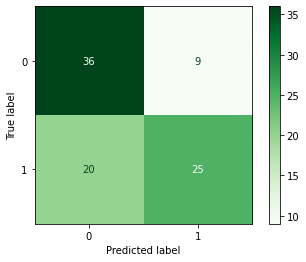

In [123]:
plot_confusion_matrix(log_mdl, X_val, y_val,cmap='Greens') 

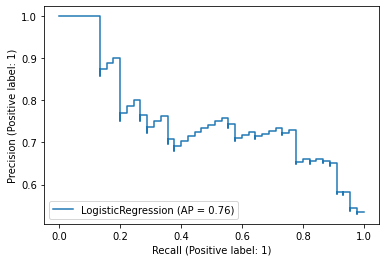

In [124]:
PrecisionRecallDisplay.from_estimator(log_mdl, X_val, y_val)